# INTRODUCTION TO KNN MODELLING IN PYTHON WITH SCIKIT-LEARN

Well the approach here is to play with understanding the steps needed to run a KNN model and how to apply it towards classification + regression.  From there, we'll be running these models using some test data sets and then practice from there with more complex data (*just to reinforce the use of other functions and methods*). 

# STEP 1: Importing the necessary libraries to do this process

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re 
import datetime as dt
%matplotlib inline

In [2]:
import scipy.stats as ss # For running statistical functions 
import sklearn.neighbors as sn
import random 
import sklearn.metrics as sm

# STEP 2: Read in the data set and add a column header for it 

In [3]:
iris = pd.read_csv("C:/Users/micha/Documents/MyDatasets/iris.data", sep = ",")

In [4]:
iris.columns = ['sepal_length_cm', 'sepal_width_cm','petal_length_cm', 'petal_width_cm', 'class']

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  149 non-null    float64
 1   sepal_width_cm   149 non-null    float64
 2   petal_length_cm  149 non-null    float64
 3   petal_width_cm   149 non-null    float64
 4   class            149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
np.random.seed(123)

# STEP 3: Performing KNN

The process of a KNN model (at it's most fundamental level) is just calculating the distance b/t the selected criteria and then find the number of neighbours closest to it as to make a model that'll be used to make prediction

#### STEP 3A: Split the data + Defining Predictors/Target

A multi-step approach that initially uses the numpy.random.permutation() function that **randomly permutates a sequence and returns a permutated range of values**. This takes in the argument as the length of the dataframe. 

From here we can then split up the data set manually in accordance to what we want the make up of the train:test split to look like (i.e., 80-20, 75-25, 50-50, etc.)

Afterwards, you would just split the dataframe up to grab the variables you want as predictors (everything else) and target (this case class of flower)

In [7]:
# Randomize the dataframe first 
iris_1 = iris.loc[np.random.permutation(len(iris))]

In [8]:
# figure out the split (let's say 80:20)

print(round(len(iris)*.80,0))
print(round(len(iris)*.20,0))

train_iris_1 = iris_1[:119]
test_iris_1 = iris_1[119:]

119.0
30.0


In [9]:
X_train_iris_1 = train_iris_1.iloc[:, :-1].values
Y_train_iris_1 = train_iris_1.iloc[:, -1].values
X_test_iris_1 = test_iris_1.iloc[:, :-1].values
Y_test_iris_1 = test_iris_1.iloc[:, -1].values

An alternative approach to splitting this dataset can be done using the train_test_split from the sklearn.model_selection library which takes the following make-up:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = (some value b/t 0 and 1), random_state = some integer for replicability)

where X = array of variables corresponding to the predictor variables
where Y = array corresponding to the target variable 
where test_size = equates to the desired split proportion corresponding to test data set size 

Let's say that the predictor variables = the first four variables in the data set: Sepal length + width and petal length + width with the last variable in the data set = target 

In [10]:
X = iris.iloc[:, :-1].values # .values = get the array of the series
Y = iris.iloc[:, -1].values # .values = get the array of the series

In [11]:
import sklearn.model_selection as sms

In [12]:
X_train, X_test, Y_train, Y_test = sms.train_test_split(X, Y, test_size = 0.2, random_state = 123)

#### STEP 3B: Remove any columns or variables that do not correspond to being a float/binary variable.

In this case, we don't have any.  However, in others, you would just drop them from the dataframe.  Alternatively, we can also perform a one-hot encoding to essentially treat categorical variable as binary objects and apply an appropriate distance metric to be used in fitting the model.  (*See below for example*)

#### STEP 3C: Standardize the distance

So the purpose of this is that because there is like a ton of different variability b/t variablity in terms of size, it may skew the distance of one over the other.  Thus, it is a better approach to normalize all of this along some metric. This can be done via mean of the given variable in a manner similar to Z-score (i.e., value - mean / standard deviation).

In [13]:
# Method 1: Doing this process step-by-step for each variable in data frame

sepal_length_mean = iris['sepal_length_cm'].mean()
sepal_width_mean = iris['sepal_width_cm'].mean()
petal_length_mean = iris['petal_length_cm'].mean()
petal_width_mean = iris['petal_width_cm'].mean()

sepal_length_sd = iris['sepal_length_cm'].std(ddof = 1)
sepal_width_sd = iris['sepal_width_cm'].std(ddof = 1)
petal_length_sd = iris['petal_length_cm'].std(ddof = 1)
petal_width_sd = iris['petal_width_cm'].std(ddof = 1)

In [14]:
iris['sepal_length_norm'] = iris['sepal_length_cm'].apply(lambda x: (x - sepal_length_mean)/sepal_length_sd)
iris['sepal_width_norm'] = iris['sepal_width_cm'].apply(lambda x: (x - sepal_width_mean)/sepal_width_sd)
iris['petal_length_norm'] = iris['petal_length_cm'].apply(lambda x: (x - petal_length_mean)/petal_length_sd)
iris['petal_width_norm'] = iris['petal_width_cm'].apply(lambda x: (x - petal_width_mean)/petal_width_sd)

In [15]:
normalized_iris_1 = iris.iloc[:, 4:]
normalized_iris_1.iloc[:,1:].values

array([[-1.14449547, -0.11766285, -1.34941328, -1.32060901],
       [-1.38586819,  0.34369936, -1.40624272, -1.32060901],
       [-1.50655455,  0.11301826, -1.29258383, -1.32060901],
       [-1.02380911,  1.26642378, -1.34941328, -1.32060901],
       [-0.54106368,  1.9584671 , -1.17892494, -1.05789774],
       [-1.50655455,  0.80506157, -1.34941328, -1.18925337],
       [-1.02380911,  0.80506157, -1.29258383, -1.32060901],
       [-1.74792727, -0.34834395, -1.34941328, -1.32060901],
       [-1.14449547,  0.11301826, -1.29258383, -1.45196464],
       [-0.54106368,  1.49710489, -1.29258383, -1.32060901],
       [-1.26518183,  0.80506157, -1.23575439, -1.32060901],
       [-1.26518183, -0.11766285, -1.34941328, -1.45196464],
       [-1.86861363, -0.11766285, -1.51990162, -1.45196464],
       [-0.05831824,  2.1891482 , -1.46307217, -1.32060901],
       [-0.1790046 ,  3.11187262, -1.29258383, -1.05789774],
       [-0.54106368,  1.9584671 , -1.40624272, -1.05789774],
       [-0.90312275,  1.

This is too long, a better approach would be to use the object StandardScaler from the sklearn.preprocessing library which allows the use of the method .fit() which takes the inputs 

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Establishes an object that "takes in the inputs" 
scaler.fit(iris.iloc[:, :4]) # using the .fit method to apply the normalization process using the mean + standard deviation for a given variable
scaler.transform(iris.iloc[:, :4]) # transforms the selected variable into a normalized version. 

array([[-1.1483555 , -0.11805969, -1.35396443, -1.32506301],
       [-1.3905423 ,  0.34485856, -1.41098555, -1.32506301],
       [-1.51163569,  0.11339944, -1.29694332, -1.32506301],
       [-1.02726211,  1.27069504, -1.35396443, -1.32506301],
       [-0.54288852,  1.9650724 , -1.18290109, -1.0614657 ],
       [-1.51163569,  0.8077768 , -1.35396443, -1.19326436],
       [-1.02726211,  0.8077768 , -1.29694332, -1.32506301],
       [-1.75382249, -0.34951881, -1.35396443, -1.32506301],
       [-1.1483555 ,  0.11339944, -1.29694332, -1.45686167],
       [-0.54288852,  1.50215416, -1.29694332, -1.32506301],
       [-1.2694489 ,  0.8077768 , -1.23992221, -1.32506301],
       [-1.2694489 , -0.11805969, -1.35396443, -1.45686167],
       [-1.87491588, -0.11805969, -1.52502777, -1.45686167],
       [-0.05851493,  2.19653152, -1.46800666, -1.32506301],
       [-0.17960833,  3.122368  , -1.29694332, -1.0614657 ],
       [-0.54288852,  1.9650724 , -1.41098555, -1.0614657 ],
       [-0.90616871,  1.

In [17]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### STEP 3D: Calculate the Euclidean distance or distance metric 

There are different metric that one can use to calculate the distance b/t values, however the most popular is Euclidean distance

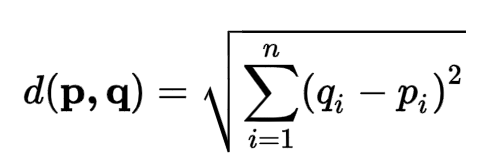

The basic way to do this is to just individually calculate this measure using this formula

In [18]:
test_a = normalized_iris_1["sepal_length_norm"][:5]
test_b = normalized_iris_1["sepal_width_norm"][:5]
test_c = normalized_iris_1["petal_length_norm"][:5]

distances = []

for i in range(len(test_a)):
    dist = (test_a[i] - test_b[i])**2
    distances.append(dist)
    
np.sqrt(sum(distances))

4.261645935061316

However, this is tedious to do.  A better method is to use a function from the scipy.spatial library called distance.euclidean that takes the different pairing and calculates the distance. Note that this only calculates the distance between **TWO** 1-dimensional arrays

In [19]:
from scipy.spatial import distance
distance.euclidean(test_a, test_b)

4.261645935061316

#### STEP 3E: Fit a Model + Make Predictions

This can be summed up by using a model object from the sklearn.neighbors library called KNeighborsclassifier/Regressor which is an object that is used to provide predictions given training data input either to classify something or estimate given continuous value.

Here, we create the KNN model object which has serval parameters to work from with n_neighbours = number of neighbours to use to establish prediction.  The general rule with n is that if it's high = suppresses noise, but has very weak boundaries in comparing one with another value. 

You then apply the .fit() method to fit that KNN object to the training data (the predictor + test label) to calibrate the model and then use the .predict method to make the predictions using the test predictors. 

In [20]:
knn = sn.KNeighborsClassifier(n_neighbors = 5,
                              weights = 'uniform',
                              algorithm = "auto", 
                              metric = "euclidean") 

# Here we created the object to be used with training data for making a model for predicting classes with the following arguments 

In [21]:
# We now fit that object with data to train it

knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
predictions = knn.predict(X_test)

In [23]:
predictions # an array of prediction using the test data set with predictors

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [24]:
Y_test

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

#### STEP 3F: Perform an evaluation of the model performance

Done by comparing the accuracy of the predicted classification against the true using two metrics: confusion_matrix and accuracy_score

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
accuracy_score(predictions, Y_test)*100

93.33333333333333

In [27]:
confusion_matrix(predictions, Y_test)

array([[13,  0,  0],
       [ 0,  6,  2],
       [ 0,  0,  9]], dtype=int64)

Looks like there was only 2 prediction off from the true value in this model. Thus we can say that it's a pretty good one.  

# STEP 4: Optimizing the Model 

Often we start off with most model building using either 1 or 2 feature or all features prior to building the model and using it for prediction.  However, there is usually a smarter approach to doing this which avoids two of the biggest issue with model building: 

1) Overfitting: when a statistical model fits exactly against its training data where it makes it perform inadequately when gernalized to a new set of data 

2) Underfitting: unable to capture the relationship between the input and output variables accurately due to how reductionistic the model is

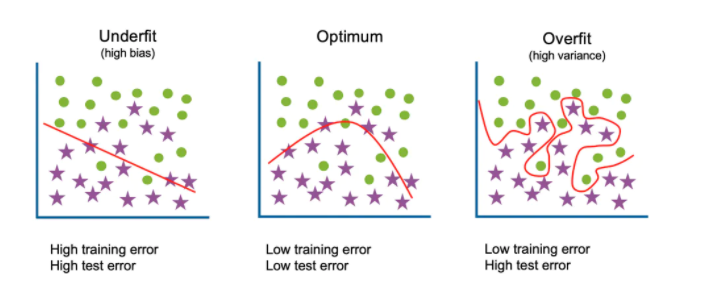

So in one instance, deciding which feature to use is best practice in generating a model. 

Another approach to this is by using what is known as hyperparameter tuning, which acts to optimize the arguments used in the modelling process to generate the best possible accuracy outcome. 

In our case here, there appears to be a few parameters we can employ:

    1) Number of neighbors
    2) Distance metric 

In [28]:
# An array of K value to input `
hyper_param = []

for i in range(25):
    hyper_param.append(i + 1)

In [29]:
accuracy_measures = dict()

for each in hyper_param:
    
    knn = sn.KNeighborsClassifier(n_neighbors = each,
                              weights = 'uniform',
                              algorithm = "auto", 
                              metric = "euclidean") 
    
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    acc = accuracy_score(predictions, Y_test)
    
    accuracy_measures[each] = acc

In [30]:
sorted(accuracy_measures.items(), key = lambda x:x[1], reverse = True)

[(1, 0.9666666666666667),
 (2, 0.9666666666666667),
 (3, 0.9666666666666667),
 (11, 0.9666666666666667),
 (13, 0.9666666666666667),
 (4, 0.9333333333333333),
 (5, 0.9333333333333333),
 (6, 0.9333333333333333),
 (7, 0.9333333333333333),
 (8, 0.9333333333333333),
 (9, 0.9333333333333333),
 (10, 0.9333333333333333),
 (14, 0.9333333333333333),
 (15, 0.9333333333333333),
 (16, 0.9333333333333333),
 (17, 0.9333333333333333),
 (19, 0.9333333333333333),
 (12, 0.9),
 (18, 0.9),
 (20, 0.9),
 (21, 0.9),
 (22, 0.9),
 (23, 0.9),
 (24, 0.9),
 (25, 0.9)]

With this method of hyperparameter tuning, we can see that the highest number of neighbours to use that give a comparable level of accuracy is 13.  However, there are other ways we can blow this up like with metric used. 

In [31]:
manhattan_accuracy_measures = dict()

for each in hyper_param:
    
    knn = sn.KNeighborsClassifier(n_neighbors = each,
                              weights = 'uniform',
                              algorithm = "auto", 
                              metric = "manhattan") 
    
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    acc = accuracy_score(predictions, Y_test)
    
    manhattan_accuracy_measures[each] = acc

In [32]:
sorted(manhattan_accuracy_measures.items(), key = lambda x:x[1], reverse = True)

[(1, 0.9666666666666667),
 (2, 0.9666666666666667),
 (3, 0.9666666666666667),
 (13, 0.9666666666666667),
 (15, 0.9666666666666667),
 (4, 0.9333333333333333),
 (5, 0.9333333333333333),
 (6, 0.9333333333333333),
 (7, 0.9333333333333333),
 (8, 0.9333333333333333),
 (9, 0.9333333333333333),
 (10, 0.9333333333333333),
 (11, 0.9333333333333333),
 (12, 0.9333333333333333),
 (14, 0.9333333333333333),
 (16, 0.9333333333333333),
 (17, 0.9333333333333333),
 (19, 0.9333333333333333),
 (21, 0.9333333333333333),
 (18, 0.9),
 (22, 0.9),
 (23, 0.9),
 (25, 0.9),
 (20, 0.8666666666666667),
 (24, 0.8666666666666667)]

Obviously the potential issue is that we might have to contend with the fact that because of sampling chance, we get the response we get.  So it might be best to do a series of resampling to get a more accurate averaged out level of accuracy.  This can be done with Cross-Validation. 

The process works like the following: 

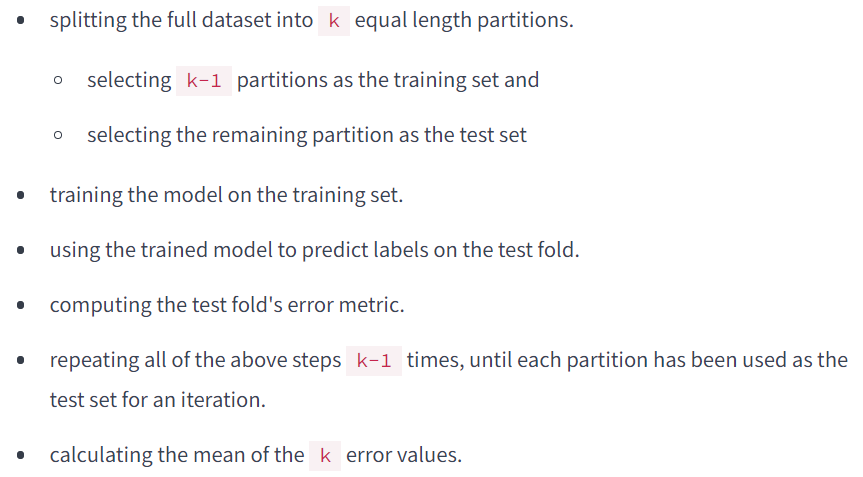

In our case, we will instance the class KFold from the sklearn.model_selection library which takes a few arguments:

    * n_splits (number of splits)
    * shuffle = True/False; toggle shuffling of the ordering of the observations in the dataset
    * random_state = set a value for establishing the random permutation (set for reproducibility)
    
When we create the KFold class, we will impute this to the cross_val_score function as an argument which performs the cross-validation + provide score. This has several arguments:

    * estimator = the model which you'll be using to cross-validate
    * X = the corresponding predictor variables for your model
    * y = the target variable for your model 
    * scoring = a string defining the method to which to evaluate the performance of the model found here (https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
    * cv = cross-validation generator that determines the cross-validation splitting strategy

In [33]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits = 5,
     shuffle = True,
     random_state = 123)

In [34]:
knn = sn.KNeighborsClassifier(metric = 'euclidean') # Let's establish the use of euclidean distance as the distance metric here
acc = cross_val_score(estimator = knn, X = iris.iloc[:, 5:9].values, y = iris.iloc[:,4].values, cv = kf,  scoring = "accuracy")
acc

array([0.93333333, 0.96666667, 0.93333333, 0.86666667, 1.        ])

In [35]:
# Take the average of the Acc score to get a finalized accuracy 
np.mean(acc)*100

93.99999999999999

It looks like using all 4 variables to predict classification of Iris plant after employing Cross-Validation = 93.99% accuracy

Here we didn't really modify KNN class, so we need to search out the best parameters to work in conjunction with the Cross-Validation method.  This can be done using the GridSearchCV function from the sklearn.model_selection library which takes in the following arguments:

* estimator 
* param_grid = establishing a grid in the form of a dictionary where string as label to identify the corresponding argument to modify in the estimator (say n_neighbors for number of neighbors to use in KNN) with a value represented in the form of a range of numbers 
* scoring metric 
* cv for cross-validation generator 

In [36]:
param_grid = {"n_neighbors": np.arange(1,25)}

from sklearn.model_selection import GridSearchCV

In [37]:
knn = sn.KNeighborsClassifier(metric = "euclidean")
knn_GridCV = GridSearchCV(knn, param_grid, cv = kf, scoring = "accuracy")

From here, we want to next fit the model with the training predictors + target variable using the .fit() method.  Afterwards, we can get the best possible parameters using the .best_params_ method. 

In [38]:
knn_GridCV.fit(X = iris.iloc[:, 5:9].values, y = iris.iloc[:,4].values)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='euclidean',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

There are attributes that one can use to select the appropriate summary score within the sklearn.model_selection.GridSearchCV method

In [39]:
knn_GridCV.best_params_

{'n_neighbors': 13}

In [40]:
knn_GridCV.best_score_

0.96

Thus, using the grid search 5-fold, cross-validation method + hyperparameter tuning, we were able to ID the best performing model (k = 13, using the Euclidean distance metric) with using the 4 normalized numeric predictors to classify the type of Iris with an average accuracy of 96%.

# UNDERSTANDING THIS BUT FOR REGRESSION

Much of the same process used above will apply here except for certain differences, namely the use of KNeighborsRegressor, the difference in accuracy metric, etc. 

Let's use a separate data to show this off, say this data set on Automobiles. 

#### STEP 1: Reading in the data 

In [41]:
automobile = pd.read_csv("C:/Users/micha/Documents/MyDatasets/imports-85.data", 
                         sep = ",", 
                         header = 0, 
                         na_values = "?",
                         names = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height", "curb_weight", "engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"])
automobile.head(4)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [42]:
automobile.describe(include = 'all')

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,204.000000,164.000000,204,204,204,202,204,204,204,204.000000,...,204.000000,204,200.000000,200.000000,204.000000,202.000000,202.000000,204.000000,204.000000,200.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,184,167,114,96,120,201,NaN,...,NaN,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.823529,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.806373,...,126.892157,NaN,3.329050,3.258300,10.148137,104.222772,5125.990099,25.240196,30.769608,13205.690000
std,1.239035,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.994144,...,41.744569,NaN,0.274044,0.314868,3.981000,39.810182,480.443680,6.551513,6.898337,7966.982558
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,119.500000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10270.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,142.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.750000


In [43]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               204 non-null    object 
 3   fuel_type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num_doors          202 non-null    object 
 6   body_style         204 non-null    object 
 7   drive_wheels       204 non-null    object 
 8   engine_location    204 non-null    object 
 9   wheel_base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb_weight        204 non-null    int64  
 14  engine_type        204 non-null    object 
 15  num_cylinders      204 non-null    object 
 16  engine_size        204 non

| Variable | Description | Data Type |
|----------|-------------|-----------|
| symboling | IDK | Looks to be categorical |
| normalized_losses | the degree of loss in pricing in used market | numerical | 
| make | make of the car | categorical |
| fuel_type | type of car fuel | categorical |
| aspiration | transmission type | categorical | 
| num_doors | number of doors on vehicle | categorical | 
| body_style | type of car body | categorical | 
| drive_wheels | type of wheel drive | categorical |
| engine_location | Location of engine on vehicle | categorical|
| wheel_base | horizontal distance between the centers of the front and rear wheels | numerical |
| length | length of car | numeric |
| width | width of car | numeric |
| height | height of car | numeric |
| curb_weight | weight of the car | numeric | 
| engine_type | type of engine | categorical | 
| num_cylinder | number of cylinders in engine | categorical | 
| engine_size | size of the engine | numeric |
| fuel_system | fuel system of the engine | categorical |
| bore | diameter of each cylinder | numeric |
| stroke | length of piston from top to bottom | numeric |
| compression_ratio | ratio between the volume of the cylinder and combustion chamber in an internal combustion engine | numeric| 
| horsepower | horsepower of engine | numeric |
| peak_rpm | max RPM of engine | numeric |
| city_mpg | city mileage per gallon | numeric |
| highway_mpg | highway mileage per gallon | numeric | 
| price | cost of vehicle | numeric |

#### STEP 2: Cleaning the data

In [44]:
automobile['normalized_losses'].value_counts(dropna = False) # There appears to be 40 rows with missing normalized losses? 

NaN      40
161.0    11
91.0      8
150.0     7
104.0     6
134.0     6
128.0     6
94.0      5
74.0      5
85.0      5
103.0     5
168.0     5
95.0      5
102.0     5
65.0      5
93.0      4
148.0     4
106.0     4
122.0     4
118.0     4
83.0      3
154.0     3
125.0     3
137.0     3
101.0     3
115.0     3
89.0      2
110.0     2
145.0     2
119.0     2
197.0     2
164.0     2
108.0     2
188.0     2
129.0     2
81.0      2
192.0     2
158.0     2
153.0     2
87.0      2
194.0     2
113.0     2
121.0     1
98.0      1
186.0     1
78.0      1
107.0     1
77.0      1
90.0      1
256.0     1
231.0     1
142.0     1
Name: normalized_losses, dtype: int64

In [45]:
automobile[automobile['normalized_losses'].isnull()]
automobile[(automobile['normalized_losses'].isnull()) & (automobile['price'].isnull())]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
8,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
43,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
44,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
128,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


It's conceivable that we can't get a normalized loss on price if we don't know it to begin with.  So let's just get rid of these rows. 

In [46]:
autos = automobile[(automobile['price'].notnull())]

In [47]:
autos

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
201,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
202,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [48]:
print(autos['normalized_losses'].mean())
print(autos['normalized_losses'].median())
print(autos['normalized_losses'].std())
import statistics as stats
print(stats.mode(autos['normalized_losses']))

122.0
115.0
35.442167530553256
161.0


In [49]:
autos_correct = autos

In [50]:
autos_correct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_doors          198 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_cylinders      200 non-null    object 
 16  engine_size        200 non

Considering that whatever we do, we'll introduce bias into the data since the missing values in normalized losses equates to about 20% of the data, removing this data = significantly reduction in predictive power.  Imputation at least maintains this. 

In [51]:
autos_correct["normalized_losses"] = autos["normalized_losses"].replace(np.nan, np.nanmean(autos['normalized_losses']))

C:\Users\micha\anaconda3.0\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
# Looking at those with missing doors 

autos_correct[autos_correct['num_doors'].isnull()] # Since these are sedans, it meas they should have 4 doors. 
autos_correct['num_doors'] = autos_correct['num_doors'].replace(np.nan, "four")

C:\Users\micha\anaconda3.0\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [53]:
autos_correct[autos_correct['bore'].isnull()]

# It looks like these rows with a missing bore are usually mazda hatchback 
# with gas engine and rear-wheel drive let's look at these types of vehicles

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
54,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


#### Just for the sake of showing off that I did some statistical test to show off I know what I'm doing, let's get an understanding of what relates to price value

**NOTE:** This basically means we'll be doing a series of ANOVA + TukeyHSD & Student's T-test in order to see whether we should consider taking a variable to predict pricing for these vehicles or not (at least for categorical variables).  As for numerical ones, we'll apply the use of correlation to figure which sticks.  Typically those indicating a strong relationship (i.e., r >= 0.5). 

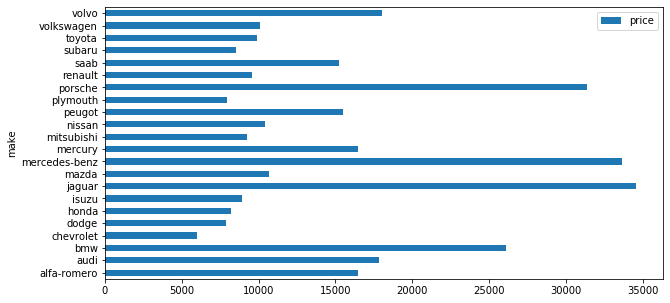

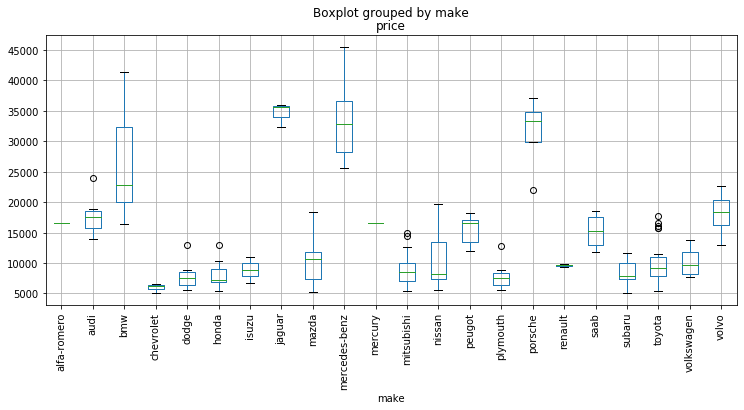

In [54]:
# Bore in terms of make of car
autos_correct[['make', 'price']].groupby("make").agg(np.mean).plot(kind = 'barh', figsize = (10,5))
plt.show()
autos_correct.boxplot("price", by = "make", figsize = (12,5))
plt.xticks(rotation = 90)
plt.show()

In [55]:
# Let's calculate ANOVA to see if there is a diff 

import statsmodels.api as statsmodel
from statsmodels.formula.api import ols

In [56]:
mod = ols("price~make", data =  autos_correct).fit()
aov_table = statsmodel.stats.anova_lm(mod, typ =2)
aov_table # Looks like there is a significant difference here

,sum_sq,df,F,PR(>F)
make,1.005866e+10,21.0,33.143345,1.837831e-50
Residual,2.572434e+09,178.0,NaN,NaN


In [57]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog = autos_correct[autos_correct['price'].notnull()]['price'].values,
                  groups = autos_correct[autos_correct['price'].notnull()]['make'].values, 
                  alpha = 0.05))

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
    group1        group2      meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------------------
  alfa-romero          audi   1359.1667    0.9  -9968.7754  12687.1087  False
  alfa-romero           bmw     9618.75 0.1747  -1349.4827  20586.9827  False
  alfa-romero     chevrolet    -10493.0 0.2621 -23158.0242   2172.0242  False
  alfa-romero         dodge  -8624.5556 0.3366 -19470.2343   2221.1232  False
  alfa-romero         honda  -8315.3077 0.3523 -18853.2448   2222.6294  False
  alfa-romero         isuzu     -7583.5    0.9 -21457.3389   6290.3389  False
  alfa-romero        jaguar     18100.0  0.001   5434.9758  30765.0242   True
  alfa-romero         mazda  -5847.1176 0.8974 -16218.4366   4524.2013  False
  alfa-romero mercedes-benz     17147.0  0.001   6178.7673  28115.2327   True
  alfa-romero       mercury         3.0    0.9 -16988.9131  1699

Looks like bore seems to be significantly different b/t car makers, largely between Luxury and Non-Luxury car makers. 

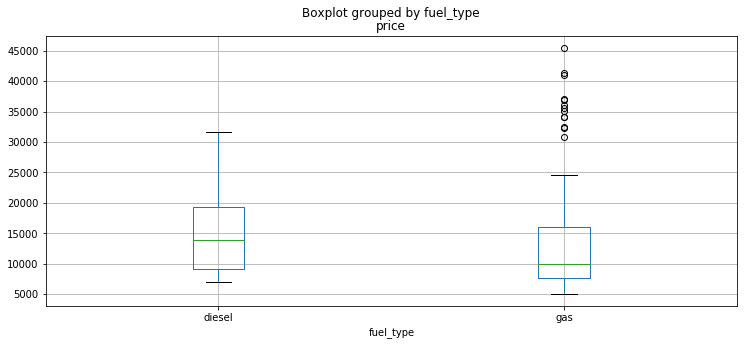

In [58]:
autos_correct.boxplot("price", by = "fuel_type", figsize = (12,5))

Just observing the visual distribution of price by fuel type, there doesn't appears to be a significant difference here.  Probably safe to bet that there isn't one here. But, let's just do a T-test for the sake of comparison.

In [59]:
t, p = ss.ttest_ind(autos_correct[(autos_correct['fuel_type'] == 'gas') & (autos_correct['price'].notnull())]['price'].values,
                    autos_correct[(autos_correct['fuel_type'] == 'diesel')  & (autos_correct['price'].notnull())]['price'].values)

t, p 

(-1.5632607212584766, 0.11958814295878828)

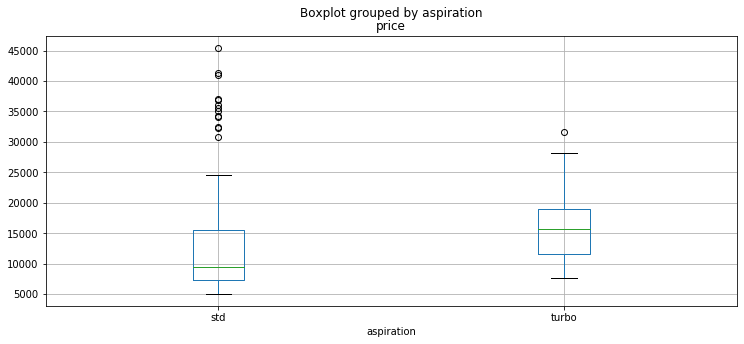

In [60]:
autos_correct.boxplot("price", by = "aspiration", figsize = (12,5))

It looks like there might be something here. So let's just test this out via T-test

In [61]:
t, p = ss.ttest_ind(autos_correct[(autos_correct['aspiration'] == 'std') & (autos_correct['price'].notnull())]['price'].values,
                    autos_correct[(autos_correct['aspiration'] == 'turbo')  & (autos_correct['price'].notnull())]['price'].values)

t, p 

(-2.5713621741027657, 0.01086328504126124)

Yep, it looks like price is significantly different with respect to transmission type with turbo > std transmission

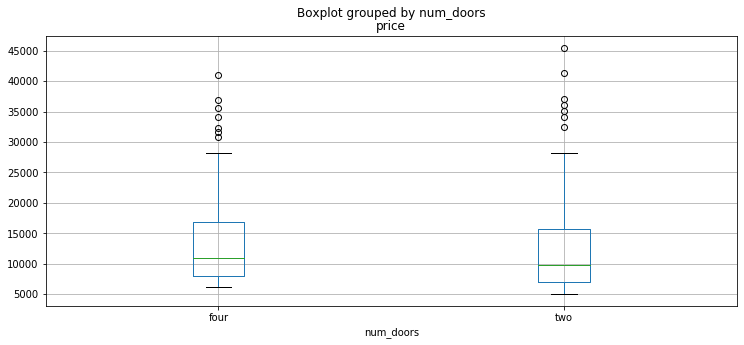

In [62]:
autos_correct.boxplot("price", by = "num_doors", figsize = (12,5))

Doesn't seem to be the case here, but never know. 

In [63]:
t, p = ss.ttest_ind(autos_correct[(autos_correct['num_doors'] == 'four') & (autos_correct['price'].notnull())]['price'].values,
                    autos_correct[(autos_correct['num_doors'] == 'two')  & (autos_correct['price'].notnull())]['price'].values)

t, p 

(0.6026427374407659, 0.5474359678066882)

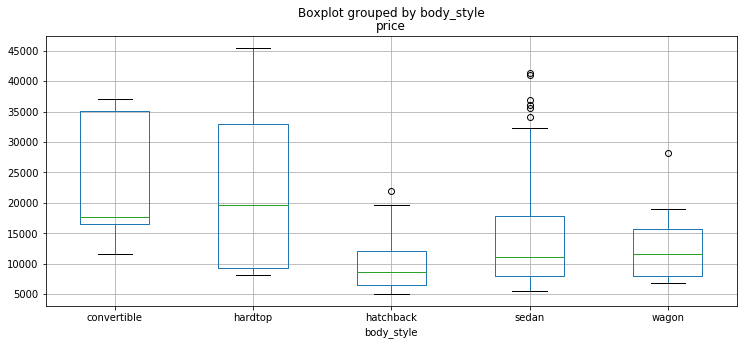

In [64]:
autos_correct.boxplot("price", by = "body_style", figsize = (12,5))

In [65]:
mod = ols("price~body_style", data =  autos_correct).fit()
aov_table = statsmodel.stats.anova_lm(mod, typ =2)
aov_table # Looks like there is a significant difference here

,sum_sq,df,F,PR(>F)
body_style,2.068144e+09,4.0,9.544875,4.550871e-07
Residual,1.056295e+10,195.0,NaN,NaN


In [66]:
print(pairwise_tukeyhsd(endog = autos_correct[autos_correct['price'].notnull()]['price'].values,
                  groups = autos_correct[autos_correct['price'].notnull()]['body_style'].values, 
                  alpha = 0.05))

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
   group1     group2    meandiff  p-adj     lower      upper    reject
----------------------------------------------------------------------
convertible   hardtop     -1361.1    0.9 -12914.4299 10192.2299  False
convertible hatchback -13612.1588  0.001 -23002.6318 -4221.6859   True
convertible     sedan  -9109.8447 0.0581 -18410.9415   191.2521  False
convertible     wagon   -11197.64 0.0184 -21125.8537 -1269.4263   True
    hardtop hatchback -12251.0588  0.001  -19825.888 -4676.2297   True
    hardtop     sedan  -7748.7447 0.0376 -15212.4874   -285.002   True
    hardtop     wagon    -9836.54 0.0103 -18068.5799 -1604.5001   True
  hatchback     sedan   4502.3141 0.0015   1276.0151  7728.6132   True
  hatchback     wagon   2414.5188 0.6103  -2325.5267  7154.5643  False
      sedan     wagon  -2087.7953 0.6904  -6648.2174  2472.6268  False
----------------------------------------------------------------------


Looks like there is a difference in terms of bodytype of a car, notably between hardtops + convertable (typically faster cars) against the sedan + wagon, which are usually slower cars

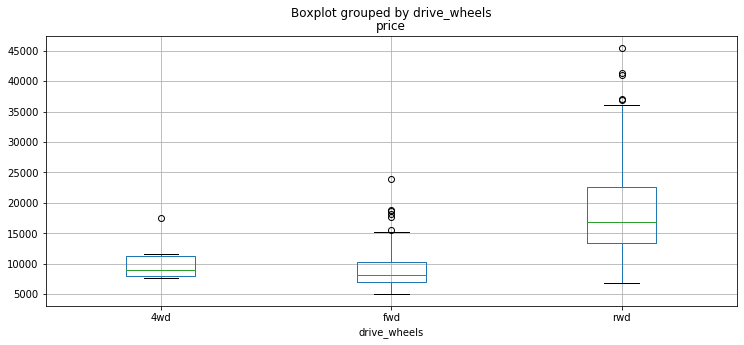

In [67]:
autos_correct.boxplot("price", by = "drive_wheels", figsize = (12,5))

There definitely is a clear difference here, just a matter of which.

In [68]:
print(pairwise_tukeyhsd(endog = autos_correct[autos_correct['price'].notnull()]['price'].values,
                  groups = autos_correct[autos_correct['price'].notnull()]['drive_wheels'].values, 
                  alpha = 0.05))

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   4wd    fwd  -996.2203 0.8908 -6302.3882  4309.9475  False
   4wd    rwd  9601.2432  0.001   4195.844 15006.6425   True
   fwd    rwd 10597.4636  0.001  8443.8119 12751.1152   True
------------------------------------------------------------


Looks like there is a significant difference b/t RWD with either 4WD and FWD which is superior to the other two. 

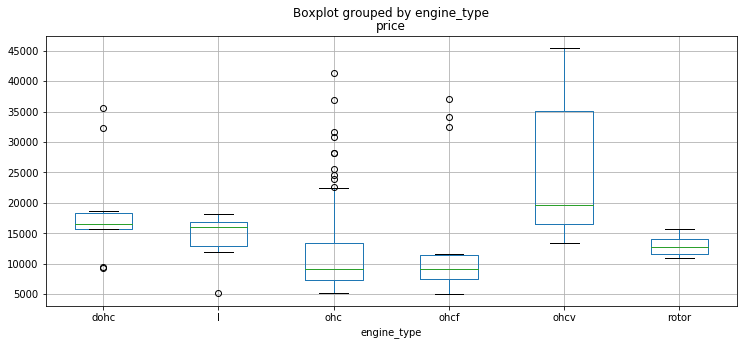

In [69]:
autos_correct.boxplot("price", by = "engine_type", figsize = (12,5))

In [70]:
print(pairwise_tukeyhsd(endog = autos_correct[autos_correct['price'].notnull()]['price'].values,
                  groups = autos_correct[autos_correct['price'].notnull()]['engine_type'].values, 
                  alpha = 0.05))

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------
  dohc      l  -3908.9621 0.7577 -12562.0364  4744.1122  False
  dohc    ohc  -6969.1868 0.0271 -13452.1781  -486.1956   True
  dohc   ohcf  -4797.9455 0.5411 -13026.7772  3430.8863  False
  dohc   ohcv   6561.8392 0.2316  -1930.5734 15054.2517  False
  dohc  rotor  -5516.5455 0.7511 -17620.0956  6587.0047  False
     l    ohc  -3060.2247 0.6922  -9287.0787  3166.6293  False
     l   ohcf   -888.9833    0.9  -8917.5702  7139.6035  False
     l   ohcv  10470.8013 0.0048   2172.2709 18769.3316   True
     l  rotor  -1607.5833    0.9  -13575.894 10360.7273  False
   ohc   ohcf   2171.2414 0.8659  -3451.1858  7793.6686  False
   ohc   ohcv   13531.026  0.001   7529.4357 19532.6163   True
   ohc  rotor   1452.6414    0.9  -9054.2107 11959.4935  False
  ohcf   ohcv  11359.7846  0.001   3504.6218 19214.9474

There are difference in terms of engine type with price with OHCV being the notably pricier over the others. 

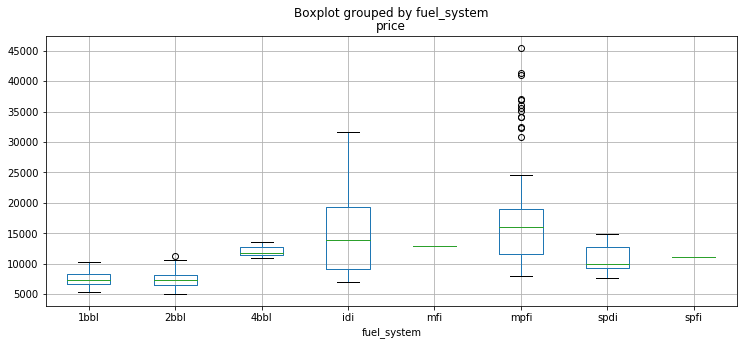

In [71]:
autos_correct.boxplot("price", by = "fuel_system", figsize = (12,5))

In [72]:
print(pairwise_tukeyhsd(endog = autos_correct[autos_correct['price'].notnull()]['price'].values,
                  groups = autos_correct[autos_correct['price'].notnull()]['fuel_system'].values, 
                  alpha = 0.05))

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
  1bbl   2bbl  -122.3423    0.9   -6642.856  6398.1713  False
  1bbl   4bbl  4589.4545    0.9  -8422.5605 17601.4696  False
  1bbl    idi  8282.6045 0.0192    783.5413 15781.6678   True
  1bbl    mfi  5408.4545    0.9 -15457.1892 26274.0983  False
  1bbl   mpfi 10094.7622  0.001   3717.7015  16471.823   True
  1bbl   spdi   3434.899    0.9  -5544.2444 12414.0424  False
  1bbl   spfi  3492.4545    0.9 -17373.1892 24358.0983  False
  2bbl   4bbl  4711.7969    0.9  -7089.3522 16512.9459  False
  2bbl    idi  8404.9469  0.001   3287.2782 13522.6156   True
  2bbl    mfi  5530.7969    0.9 -14602.0041 25663.5978  False
  2bbl   mpfi 10217.1046  0.001   6958.0422  13476.167   True
  2bbl   spdi  3557.2413 0.7621  -3554.6923  10669.175  False
  2bbl   spfi  3614.7969    0.9 -16518.0041 23747.5978  False
  4bbl  

There is only a few pairwise significant difference in fuel system against price.

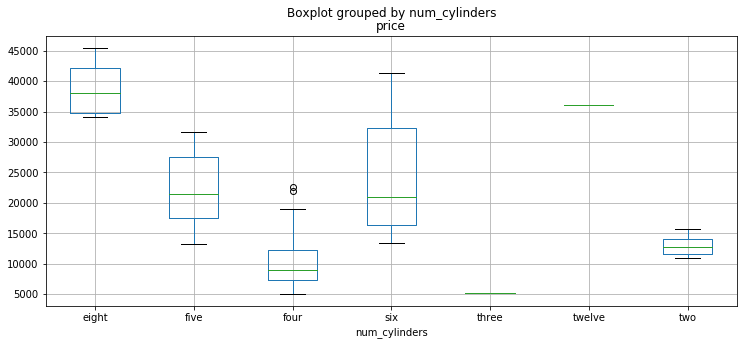

In [73]:
autos_correct.boxplot("price", by = "num_cylinders", figsize = (12,5))

In [74]:
print(pairwise_tukeyhsd(endog = autos_correct[autos_correct['price'].notnull()]['price'].values,
                  groups = autos_correct[autos_correct['price'].notnull()]['num_cylinders'].values, 
                  alpha = 0.05))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
 eight   five    -16892.4  0.001 -25562.8586  -8221.9414   True
 eight   four -28617.2628  0.001 -36038.4903 -21196.0353   True
 eight    six -15228.1667  0.001 -23143.1763  -7313.1571   True
 eight  three    -33749.0  0.001 -50134.6266 -17363.3734   True
 eight twelve     -2900.0    0.9 -19285.6266  13485.6266  False
 eight    two    -25880.0  0.001 -36243.1802 -15516.8198   True
  five   four -11724.8628  0.001 -16505.6542  -6944.0714   True
  five    six   1664.2333    0.9  -3851.9906   7180.4572  False
  five  three    -16856.6 0.0215 -32227.6802  -1485.5198   True
  five twelve     13992.4 0.1006  -1378.6802  29363.4802  False
  five    two     -8987.6 0.0367 -17658.0586   -317.1414   True
  four    six  13389.0962  0.001  10175.6104  16602.5819   True
  four  three  -5131.7372    0.9 -19834.

There seem to be a difference here with respect to number of cylinders in an engine with more cyclinder > less cylinders.  This relates to horsepower, so it makes sense. 

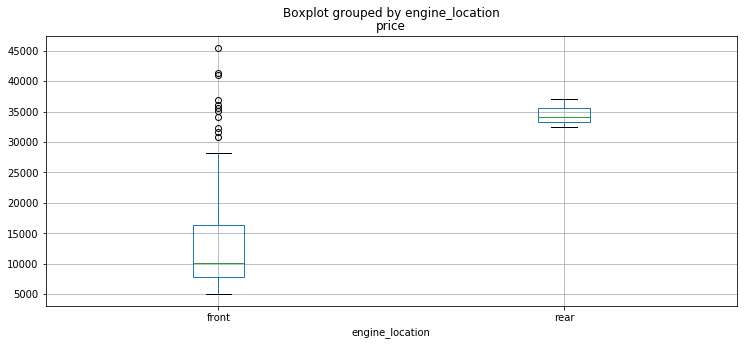

In [75]:
autos_correct.boxplot("price", by = "engine_location", figsize = (12,5))

In [76]:
t, p = ss.ttest_ind(autos_correct[(autos_correct['engine_location'] == 'front') & (autos_correct['price'].notnull())]['price'].values,
                    autos_correct[(autos_correct['engine_location'] == 'rear')  & (autos_correct['price'].notnull())]['price'].values)

t, p 

(-4.937449525070556, 1.6774371009349092e-06)

In [77]:
autos_correct.corr()['price']

symboling           -0.083327
normalized_losses    0.133999
wheel_base           0.589147
length               0.691044
width                0.752795
height               0.137284
curb_weight          0.834420
engine_size          0.872337
bore                 0.543713
stroke               0.083339
compression_ratio    0.071176
horsepower           0.810587
peak_rpm            -0.101625
city_mpg            -0.687186
highway_mpg         -0.705115
price                1.000000
Name: price, dtype: float64

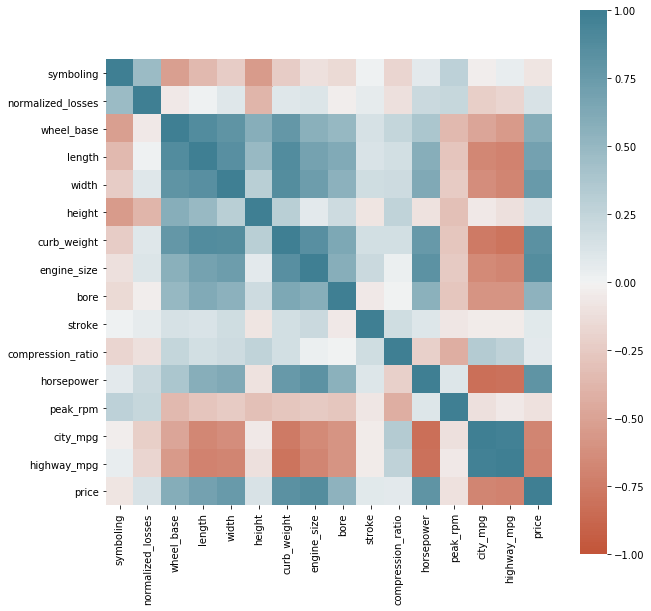

In [78]:
plt.figure(figsize = (10,10))
sns.heatmap(
    autos_correct.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.show()

Just looking at the correlation, it seems that engine size + weight of car is positively correlated with bore diameter which is inversely correlated with gas mileage. Seeing as it relates to piston size, having a bigger one facilitates more faster and more powerful force output from engine, which equates to greater ability to move vehicles faster or heavier.

All of which seems to suggest that the bigger/faster car = pricier it is. 

#### IMPUTE THE MISSING VALUES WITH AVGs

In [79]:
autos_correct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  200 non-null    float64
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_doors          200 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_cylinders      200 non-null    object 
 16  engine_size        200 non

In [80]:
autos_correct['bore'] = autos_correct['bore'].replace(np.nan, np.nanmean(autos_correct['bore']))
autos_correct['stroke'] = autos_correct['stroke'].replace(np.nan, np.nanmean(autos_correct['stroke']))
autos_correct['horsepower'] = autos_correct['horsepower'].replace(np.nan, np.nanmean(autos_correct['horsepower']))
autos_correct['peak_rpm'] = autos_correct['peak_rpm'].replace(np.nan, np.nanmean(autos_correct['peak_rpm']))

C:\Users\micha\anaconda3.0\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\micha\anaconda3.0\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\micha\anaconda3.0\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

#### STEP 3: Do Regression with KNN 

OK, so here's the thing, there needs to be quite a bit of cleaning. NAMELY, we have to deal with two big concerns: 

    1) Categorical Variables

    2) Normalizing Data to account for differences in magnitude

The thing we need to do here is that we can perform what's known as onehot encoding which essentially takes those categorical variables and essentially pivot_wide it where each class of a given category becomes it's own column and we have a binary account of whether it applies to a given entry. 

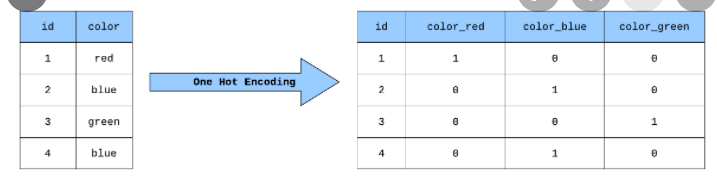

This process is possible with sklearn.preprocessing library that contains two features:

1) OneHotEncoder = creating a one hot encoding of integer encoded values

2) labelencoder = creating an integer encoding of labels

However, if you are in need to do this with multiple variables at once, use the pd.get_dummies() function and take off the first variable as it will acount for the potential issue of singularity 

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [82]:
# Select numerical variables of interest. Based on above, it seems the most important ones are those relating to engine size, speed

autos_correct.corr()['price'][((autos_correct.corr()['price'] >= 0.5) | (autos_correct.corr()['price'] <= -0.5)) & (autos_correct.corr().index != "price")].index

Index(['wheel_base', 'length', 'width', 'curb_weight', 'engine_size', 'bore',
       'horsepower', 'city_mpg', 'highway_mpg'],
      dtype='object')

In [83]:
autos_correct_numerical = autos_correct[['wheel_base', 'length', 'width', 'curb_weight', 'engine_size', 'bore','horsepower', 'city_mpg', 'highway_mpg']]

In [84]:
autos_correct_object = autos_correct.select_dtypes("object")
autos_correct_object

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
199,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
200,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
202,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


So from the above statistical test run, we saw that make, aspiration, body_style (really if either convertable or hardtop vs. rest), drive_wheels (really if rwd vs. rest), engine location, engine type (really if ohcv or not), num of cylinders. Probably a good idea to reconfigure some of the variables to make them binary (or close to it). 

In [85]:
autos_correct_object_cleaning = autos_correct_object.copy()
autos_correct_object_cleaning

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
199,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
200,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
202,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [86]:
autos_correct_object_cleaning['hardtop_convertable'] = autos_correct_object_cleaning['body_style'].apply(lambda x: "yes" if ((x == "convertible") or (x == "hardtop")) else "no")
autos_correct_object_cleaning['4wd_or_not'] = autos_correct_object_cleaning['drive_wheels'].apply(lambda x: "no" if ((x == "rwd") or (x == "fwd")) else "yes")
autos_correct_object_cleaning['ohcv_or_not'] = autos_correct_object_cleaning['engine_type'].apply(lambda x: "yes" if (x == "ohcv") else "no")
autos_correct_object_cleaning['more_than_five_cylinders'] = autos_correct_object_cleaning['num_cylinders'].apply(lambda x: "yes" if ((x == "twelve") | (x == "eight") | (x == "six") | (x == "five")) else "no")
autos_correct_object_cleaning['luxury'] = autos_correct_object_cleaning['make'].apply(lambda x: "yes" if ((x == "alfa-romero") | (x == "audi") | (x == "bmw") | (x == "mercedes-benz") | (x == "jaguar") | (x == "porsche")) else "no")
autos_correct_object_cleaning

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system,hardtop_convertable,4wd_or_not,ohcv_or_not,more_than_five_cylinders,luxury
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,yes,no,no,no,yes
1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,no,no,yes,yes,yes
2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,no,no,no,no,yes
3,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,no,yes,no,yes,yes
4,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi,no,no,no,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,no,no,no,no,no
200,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,no,no,no,no,no
201,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,no,no,yes,yes,no
202,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,no,no,no,yes,no


In [87]:
autos_correct_object_cleaning = autos_correct_object_cleaning.drop(columns = ['make', "body_style", "drive_wheels", "engine_type", "num_cylinders", "fuel_system"])
autos_correct_object_cleaning

,fuel_type,aspiration,num_doors,engine_location,hardtop_convertable,4wd_or_not,ohcv_or_not,more_than_five_cylinders,luxury
0,gas,std,two,front,yes,no,no,no,yes
1,gas,std,two,front,no,no,yes,yes,yes
2,gas,std,four,front,no,no,no,no,yes
3,gas,std,four,front,no,yes,no,yes,yes
4,gas,std,two,front,no,no,no,yes,yes
...,...,...,...,...,...,...,...,...,...
199,gas,std,four,front,no,no,no,no,no
200,gas,turbo,four,front,no,no,no,no,no
201,gas,std,four,front,no,no,yes,yes,no
202,diesel,turbo,four,front,no,no,no,yes,no


In [88]:
# One-hot encoding the variables using pd.dummies() function 

autos_correct_object_cleaned = pd.get_dummies(autos_correct_object_cleaning, drop_first = True)
autos_correct_object_cleaned

,fuel_type_gas,aspiration_turbo,num_doors_two,engine_location_rear,hardtop_convertable_yes,4wd_or_not_yes,ohcv_or_not_yes,more_than_five_cylinders_yes,luxury_yes
0,1,0,1,0,1,0,0,0,1
1,1,0,1,0,0,0,1,1,1
2,1,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,1,1
4,1,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
199,1,0,0,0,0,0,0,0,0
200,1,1,0,0,0,0,0,0,0
201,1,0,0,0,0,0,1,1,0
202,0,1,0,0,0,0,0,1,0


In [89]:
autos_clean = pd.concat([autos_correct_numerical, autos_correct_object_cleaned], axis = 1)
autos_clean['price'] = autos_correct['price']
autos_clean

,wheel_base,length,width,curb_weight,engine_size,bore,horsepower,city_mpg,highway_mpg,fuel_type_gas,aspiration_turbo,num_doors_two,engine_location_rear,hardtop_convertable_yes,4wd_or_not_yes,ohcv_or_not_yes,more_than_five_cylinders_yes,luxury_yes,price
0,88.6,168.8,64.1,2548,130,3.47,111.0,21,27,1,0,1,0,1,0,0,0,1,16500.0
1,94.5,171.2,65.5,2823,152,2.68,154.0,19,26,1,0,1,0,0,0,1,1,1,16500.0
2,99.8,176.6,66.2,2337,109,3.19,102.0,24,30,1,0,0,0,0,0,0,0,1,13950.0
3,99.4,176.6,66.4,2824,136,3.19,115.0,18,22,1,0,0,0,0,1,0,1,1,17450.0
4,99.8,177.3,66.3,2507,136,3.19,110.0,19,25,1,0,1,0,0,0,0,1,1,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,109.1,188.8,68.9,2952,141,3.78,114.0,23,28,1,0,0,0,0,0,0,0,0,16845.0
200,109.1,188.8,68.8,3049,141,3.78,160.0,19,25,1,1,0,0,0,0,0,0,0,19045.0
201,109.1,188.8,68.9,3012,173,3.58,134.0,18,23,1,0,0,0,0,0,1,1,0,21485.0
202,109.1,188.8,68.9,3217,145,3.01,106.0,26,27,0,1,0,0,0,0,0,1,0,22470.0


The next step is to split the data into two parts: target (price) and predictors (everything else). So let's do that. 

Afterwards, we'll need to normalize the predictor variables in order to account for the differences in magnitude.  This can be accomplished StandardScaler

In [90]:
target = autos_clean['price']
predictors = autos_clean.iloc[:, :-1]

In [91]:

scaler = StandardScaler() # Establishes an object that "takes in the inputs" 
scaler.fit(autos_clean.iloc[:, :-1]) # using the .fit method to apply the normalization process using the mean + standard deviation for a given variable
scaler.transform(autos_clean.iloc[:, :-1])

array([[-1.70143623, -0.44071943, -0.85715352, ..., -0.26366402,
        -0.49217479,  2.33486893],
       [-0.7218818 , -0.24585454, -0.18973699, ...,  3.79270555,
         2.0317985 ,  2.33486893],
       [ 0.15805692,  0.19259147,  0.14397128, ..., -0.26366402,
        -0.49217479,  2.33486893],
       ...,
       [ 1.70210034,  1.18315467,  1.43113173, ...,  3.79270555,
         2.0317985 , -0.42828957],
       [ 1.70210034,  1.18315467,  1.43113173, ..., -0.26366402,
         2.0317985 , -0.42828957],
       [ 1.70210034,  1.18315467,  1.43113173, ..., -0.26366402,
        -0.49217479, -0.42828957]])

In [92]:
X_train, X_test, Y_train, Y_test = sms.train_test_split(predictors, target , test_size = 0.25, random_state = 123)

In [93]:
X_train.head(5)
Y_train.head(5) 

190    13295.0
113    17075.0
45     11048.0
123    12764.0
195    15985.0
Name: price, dtype: float64

In [94]:
scaler.fit(X_train)
X_train = scaler.transform(X_train) # Predictors for the train data set
X_test = scaler.transform(X_test) # Predictors for the test data set

Let's create a KNN class to which you can use to establish the estimator for predicting prices in our data set.  Now unlike with Iris that used KNeighborsClassifier, we'll use the KNeighborsRegressor instead. 

One of the earliest things we can do when building out a KNN model is selecting the best distance metric.  While Euclidean is the most common choice, we decided on using the Manhattan matrix due to how there's a great deal of dimensionality from the different variables that's included to predict car prices. 

In [95]:
knn1 = sn.KNeighborsRegressor(algorithm = "auto", metric = "manhattan") 
knn1.fit(X_train, Y_train)
predictions = knn1.predict(X_test)
predictions

array([ 7168.8, 10966.8,  9654.6,  8030. ,  5980. , 16410.6,  8398.8,
       11154.2, 11678.2,  7576. ,  9304.6,  9234.2, 10180.2, 16208. ,
       16410.6,  6395.4, 19273. ,  8865.8, 12955.2,  6417.2,  9696.4,
        7034.6, 10195.2,  9696.4, 13090. ,  6269.4,  8529.8,  9184.4,
       10508.6, 11154.2, 14199.2,  7079.2,  9451.4,  9184.4,  6927.4,
        7027.6,  9584.6,  8647.4,  8788.2,  9010.6,  6649.4,  8030. ,
        5980. ,  6586.6,  6649.4,  9696.4,  9600.6, 15899. ,  7880.4,
       14199.2])

In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

np.sqrt(mean_squared_error(Y_test, predictions))

1924.4195848099237

In [97]:
round(r2_score(predictions, Y_test)*100, 2)

61.49

Looking at the RMSE score, it seemed like the model is a pretty poor predictor of accuracy in pricing for a vehicle with the test data.  Furthermore, looking at the model's ability to explain the variability of the pricing, it's looks to account about 61.5%, which is pretty meh.  Let's see if we can tune this to be better. 

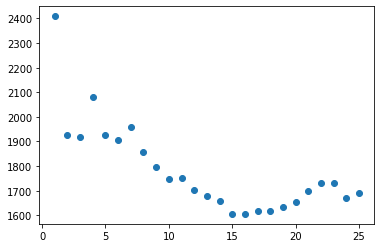

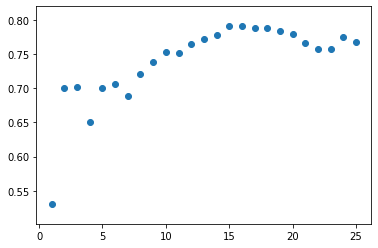

In [98]:
hyper_params = [x for x in range(1, 26)]
mse_list = list()
r2_list = list()

for hp in hyper_params:
    knn1 = sn.KNeighborsRegressor(algorithm = 'auto', metric = 'manhattan', n_neighbors = hp)
    knn1.fit(X_train, Y_train)
    predictions = knn1.predict(X_test)
    mse = mean_squared_error(Y_test, predictions)
    mse_list.append(mse)
    
    knn3 = sn.KNeighborsRegressor(algorithm = 'auto', metric = 'manhattan', n_neighbors = hp)
    knn3.fit(X_train, Y_train)
    predictions = knn3.predict(X_test)
    mse = r2_score(Y_test, predictions)
    r2_list.append(mse)
    
plt.scatter(hyper_params, np.sqrt(mse_list))
plt.show()
plt.scatter(hyper_params, r2_list)
plt.show()

Looking at the plots, it looks like the best parameter is K = 15 where it seems that there is drop in RMSE by about 300~ish with variability of predicted price being explained by approx. 79%.  However, a better approach is to apply a cross-validated approach just to show off that we produce the finding over the course of other samples. 

However, we can still use GridSearchCV to find the best possible model in our case with HyperParameter Tuning + Cross-Validation. 

In [99]:
knn2 = sn.KNeighborsRegressor(algorithm = "auto", metric = "manhattan") 

kf2 = KFold(n_splits = 10, shuffle = True, random_state = 123) # We can use either 5- or 10-fold CV method here since they are the standard

param_grid = {"n_neighbors": np.arange(1,25)} # Create the grid-search parameter which feeds in each hyperparameter individually in the model 

knn2_GridCV = GridSearchCV(knn2, param_grid, cv = kf2, scoring = "r2")

In [100]:
knn2_GridCV.fit(predictors, target)

GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='manhattan',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [101]:
knn2_GridCV.best_params_

{'n_neighbors': 3}

In [102]:
round(knn2_GridCV.best_score_*100, 2)

73.35

In [103]:
knn2 = sn.KNeighborsRegressor(algorithm = "auto", metric = "manhattan") 

kf2 = KFold(n_splits = 10, shuffle = True, random_state = 123) # We can use either 5- or 10-fold CV method here since they are the standard

param_grid = {"n_neighbors": np.arange(1,25)} # Create the grid-search parameter which feeds in each hyperparameter individually in the model 

knn2_GridCV = GridSearchCV(knn2, param_grid, cv = kf2, scoring = "neg_mean_squared_error")

In [104]:
knn2_GridCV.fit(predictors, target)
knn2_GridCV.best_params_

{'n_neighbors': 1}

In [105]:
np.sqrt(np.abs(knn2_GridCV.best_score_))

3288.7018396321673

In terms of predictability of our model using only selected variable that either had a strong correlation to price + those demonstrating a signficant difference in relation to pricing (modified to binary groupings) with K value set at 3, we can see that there was an approx. 73.4% variability in pricing following a 10-fold cross-validated approach with hyperparameter tuning. However, in terms of it's ability to predict pricing, it's still pretty poor overall when given the selected predictors.  This would make sense as there are much more to buying and predicing car prices than just the specifications of the vehicle.  However, overall, it is not too bad at an attempt in predicting scores. 

# Practice 

## Application - Recommender System Using Spotify Data

Let's take a look at the Spotify data set to see how we can make use of it in terms of a KNN modelling. Maybe picking out songs or artists to check out based on some feature, IDK? 

In [106]:
spotify = pd.read_csv("C:/Users/micha/Documents/MyDatasets/spotify_data.csv")
spotify

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


So it looks like there are over 170K songs in this data set. Also some of the variables (namely relating to artist and name of song might play a role here)

In [107]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [108]:
spotify.describe(include = 'all')

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653,170653.000000,1.706530e+05,170653.000000,170653.000000,170653,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653,170653.000000,170653,170653.000000,170653.000000
unique,NaN,NaN,NaN,34088,NaN,NaN,NaN,NaN,170653,NaN,NaN,NaN,NaN,NaN,133638,NaN,11244,NaN,NaN
top,NaN,NaN,NaN,['Эрнест Хемингуэй'],NaN,NaN,NaN,NaN,0WfcwJRdMnqgHoBwH9R3Dn,NaN,NaN,NaN,NaN,NaN,White Christmas,NaN,1945,NaN,NaN
freq,NaN,NaN,NaN,1211,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,73,NaN,1446,NaN,NaN
mean,0.528587,1976.787241,0.502115,NaN,0.537396,2.309483e+05,0.482389,0.084575,NaN,0.167010,5.199844,0.205839,-11.467990,0.706902,NaN,31.431794,NaN,0.098393,116.861590
std,0.263171,25.917853,0.376032,NaN,0.176138,1.261184e+05,0.267646,0.278249,NaN,0.313475,3.515094,0.174805,5.697943,0.455184,NaN,21.826615,NaN,0.162740,30.708533
min,0.000000,1921.000000,0.000000,NaN,0.000000,5.108000e+03,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,NaN,0.415000,1.698270e+05,0.255000,0.000000,NaN,0.000000,2.000000,0.098800,-14.615000,0.000000,NaN,11.000000,NaN,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,NaN,0.548000,2.074670e+05,0.471000,0.000000,NaN,0.000216,5.000000,0.136000,-10.580000,1.000000,NaN,33.000000,NaN,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,NaN,0.668000,2.624000e+05,0.703000,0.000000,NaN,0.102000,8.000000,0.261000,-7.183000,1.000000,NaN,48.000000,NaN,0.075600,135.537000


There doesn't seem to be any missing values, although some variables (namely date could be changed to a more appropriate data type).

#### Some cleaning to be done 

In [109]:
# Convert to datetime class + retrieve only the year component of the release date 

spotify['release_date'] = pd.to_datetime(spotify['release_date'])
spotify['release_date'] = spotify['release_date'].apply(lambda x: x.year) # Just take the year since that's what can only be salient for folks.

In [110]:
# split up the artist names from a single long piece of string containing a list of names to 
# just the principal artist (i.e., the first listed one) and one feature artist

spotify['artists_cleaning'] = spotify['artists'].str.strip().str.replace("[", "").str.replace("]", "").str.split(",")
spotify['principal_artist'] = spotify["artists_cleaning"].apply(lambda x: x[0])
spotify['has_feature'] = spotify['artists_cleaning'].apply(lambda x: True if len(x) > 1 else False)  

In [111]:
# Grab the name of the one feature artist and convert that into a dataframe and concatenate it to the spotify data frame

feature_names = []

for x in spotify['artists_cleaning']:
    if len(x) > 1:
        feature_names.append(x[1])
    else:
        feature_names.append("no feature")

features = []
        
for each in feature_names:
    new_each = each.strip()
    features.append(new_each)
    
feature_artist = pd.DataFrame(features)
feature_artist.columns = ["feature_artist"]
spotify = pd.concat([spotify, feature_artist], axis = 1)

In [112]:
# Remove the unnecessary variables + duplicates

spotify_clean = spotify.drop(columns = ['artists', 'artists_cleaning', 'year'])

In [113]:
spotify_clean

,valence,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,principal_artist,has_feature,feature_artist
0,0.0594,0.98200,0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,'Sergei Rachmaninoff',True,'James Levine'
1,0.9630,0.73200,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,'Dennis Day',False,no feature
2,0.0394,0.96100,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339,'KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,False,no feature
3,0.1650,0.96700,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109,'Frank Parker',False,no feature
4,0.2530,0.95700,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,'Phil Regan',False,no feature
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,0.08460,0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020,0.0881,105.029,'Anuel AA',True,'Daddy Yankee'
170649,0.7340,0.20600,0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020,0.0605,137.936,'Ashnikko',False,no feature
170650,0.6370,0.10100,0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020,0.0809,91.688,'MAMAMOO',False,no feature
170651,0.1950,0.00998,0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020,0.3080,75.055,'Eminem',False,no feature


In [114]:
spotify_clean['principal_artist'] = spotify_clean['principal_artist'].str.replace("'$|^'", "")
spotify_clean['feature_artist'] = spotify_clean['feature_artist'].str.replace("'$|^'", "")
spotify_clean

,valence,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,principal_artist,has_feature,feature_artist
0,0.0594,0.98200,0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,Sergei Rachmaninoff,True,James Levine
1,0.9630,0.73200,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,Dennis Day,False,no feature
2,0.0394,0.96100,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,False,no feature
3,0.1650,0.96700,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109,Frank Parker,False,no feature
4,0.2530,0.95700,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,Phil Regan,False,no feature
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,0.08460,0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020,0.0881,105.029,Anuel AA,True,Daddy Yankee
170649,0.7340,0.20600,0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020,0.0605,137.936,Ashnikko,False,no feature
170650,0.6370,0.10100,0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020,0.0809,91.688,MAMAMOO,False,no feature
170651,0.1950,0.00998,0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020,0.3080,75.055,Eminem,False,no feature


#### Now we need to do some basic exploration

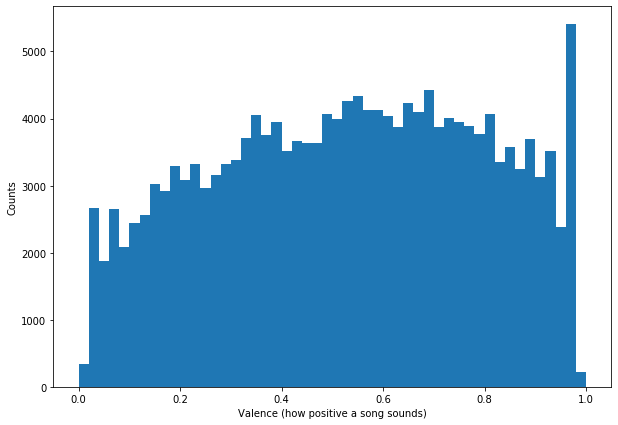

In [115]:
plt.figure(figsize = (10,7))
plt.hist("valence", data = spotify_clean, bins = 50)
plt.xlabel("Valence (how positive a song sounds)")
plt.ylabel("Counts")
plt.show()

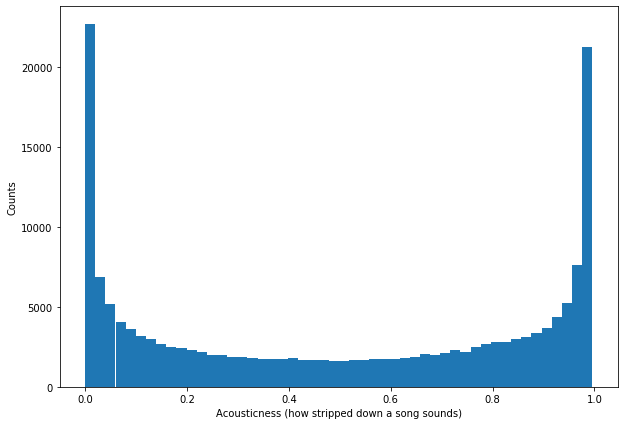

In [116]:
plt.figure(figsize = (10,7))
plt.hist("acousticness", data = spotify_clean, bins = 50)
plt.xlabel("Acousticness (how stripped down a song sounds)")
plt.ylabel("Counts")
plt.show()

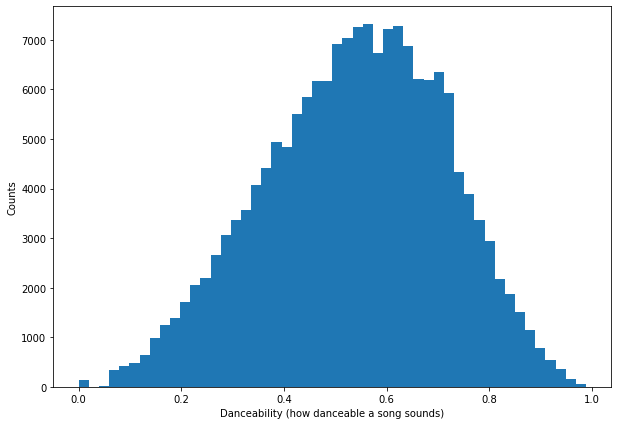

In [117]:
plt.figure(figsize = (10,7))
plt.hist("danceability", data = spotify_clean, bins = 50)
plt.xlabel("Danceability (how danceable a song sounds)")
plt.ylabel("Counts")
plt.show()

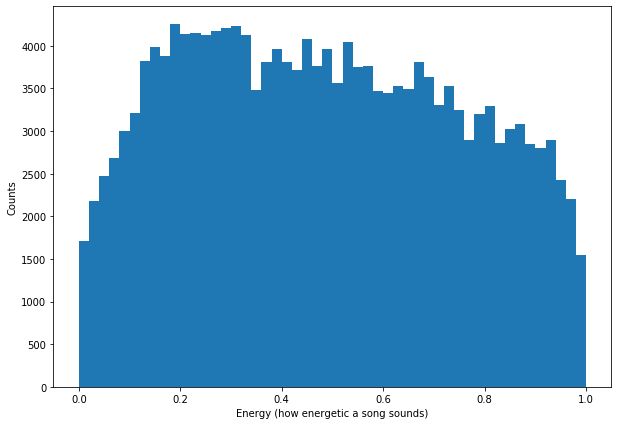

In [118]:
plt.figure(figsize = (10,7))
plt.hist("energy", data = spotify_clean, bins = 50)
plt.xlabel("Energy (how energetic a song sounds)")
plt.ylabel("Counts")
plt.show()

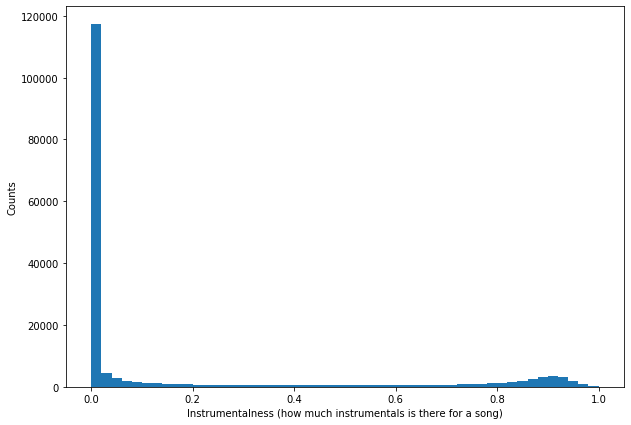

In [119]:
plt.figure(figsize = (10,7))
plt.hist("instrumentalness", data = spotify_clean, bins = 50)
plt.xlabel("Instrumentalness (how much instrumentals is there for a song)")
plt.ylabel("Counts")
plt.show()

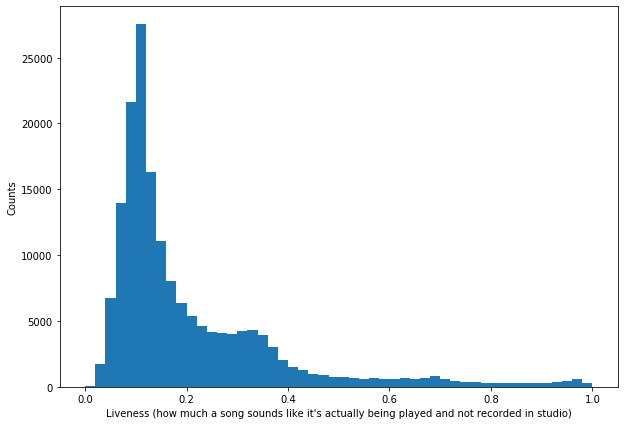

In [120]:
plt.figure(figsize = (10,7))
plt.hist("liveness", data = spotify_clean, bins = 50)
plt.xlabel("Liveness (how much a song sounds like it's actually being played and not recorded in studio)")
plt.ylabel("Counts")
plt.show()

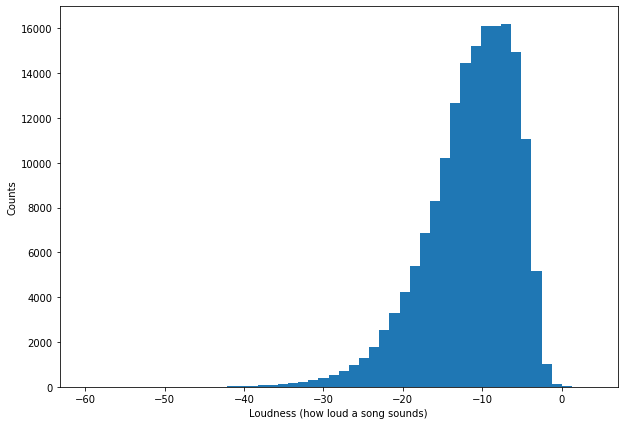

In [121]:
plt.figure(figsize = (10,7))
plt.hist("loudness", data = spotify_clean, bins = 50)
plt.xlabel("Loudness (how loud a song sounds)")
plt.ylabel("Counts")
plt.show()

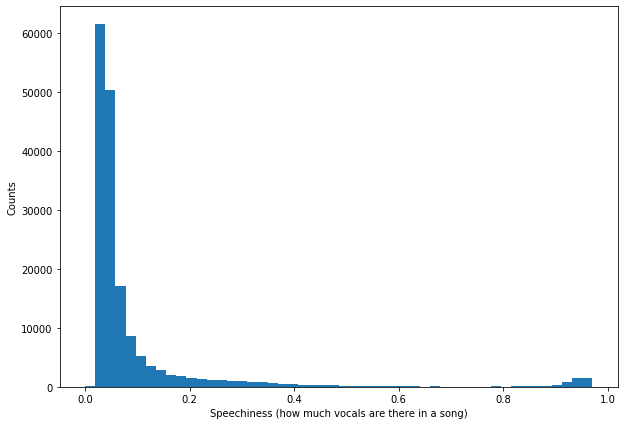

In [122]:
plt.figure(figsize = (10,7))
plt.hist("speechiness", data = spotify_clean, bins = 50)
plt.xlabel("Speechiness (how much vocals are there in a song)")
plt.ylabel("Counts")
plt.show()

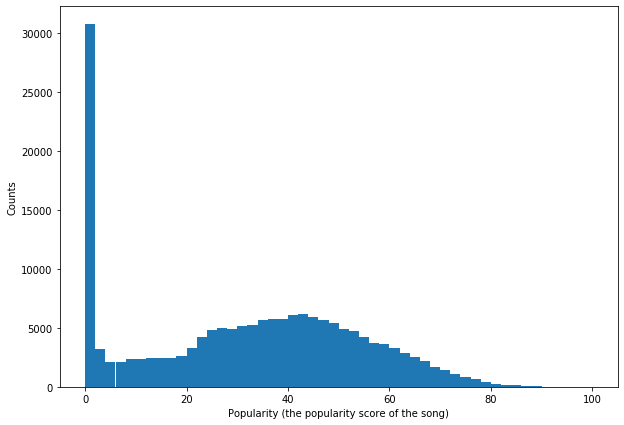

In [123]:
plt.figure(figsize = (10,7))
plt.hist("popularity", data = spotify_clean, bins = 50)
plt.xlabel("Popularity (the popularity score of the song)")
plt.ylabel("Counts")
plt.show()

In [124]:
pd.DataFrame(spotify_clean['principal_artist'].value_counts().sort_values(ascending = False).head(50))

,principal_artist
Francisco Canaro,2227
Эрнест Хемингуэй,1211
Эрих Мария Ремарк,1068
Frédéric Chopin,1016
Wolfgang Amadeus Mozart,920
Johann Sebastian Bach,901
Ludwig van Beethoven,886
Frank Sinatra,738
Billie Holiday,680
Igor Stravinsky,637


In [125]:
spotify_clean[['principal_artist', 'popularity']].groupby("principal_artist").median().sort_values(by = 'popularity', ascending = False).head(50)

,popularity
principal_artist,
Ritt Momney,93.0
Lele Pons,92.0
Jerry Di,89.0
Fousheé,88.0
Surf Mesa,88.0
salem ilese,88.0
Master KG,86.0
Manuel Turizo,86.0
Jawsh 685,86.0


#### Quick look at relationship b/t variables (specifically with popularity)

In [126]:
print(spotify_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   acousticness      170653 non-null  float64
 2   danceability      170653 non-null  float64
 3   duration_ms       170653 non-null  int64  
 4   energy            170653 non-null  float64
 5   explicit          170653 non-null  int64  
 6   id                170653 non-null  object 
 7   instrumentalness  170653 non-null  float64
 8   key               170653 non-null  int64  
 9   liveness          170653 non-null  float64
 10  loudness          170653 non-null  float64
 11  mode              170653 non-null  int64  
 12  name              170653 non-null  object 
 13  popularity        170653 non-null  int64  
 14  release_date      170653 non-null  int64  
 15  speechiness       170653 non-null  float64
 16  tempo             17

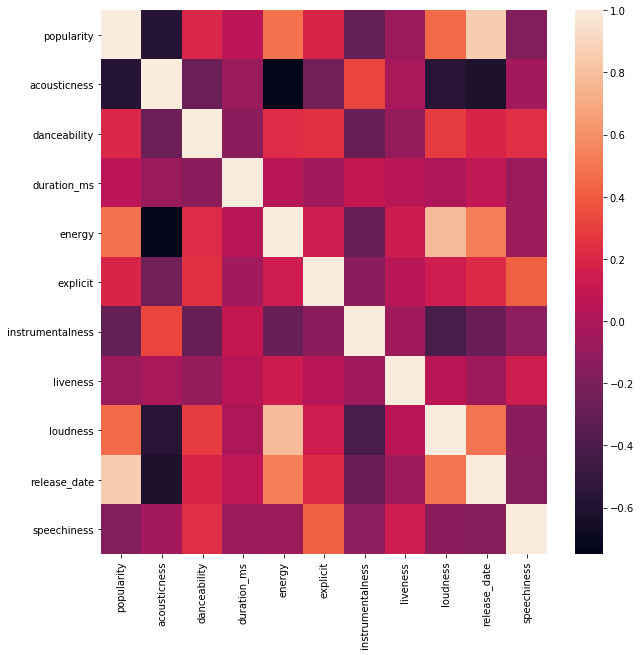

In [127]:
plt.figure(figsize = (10,10))
sns.heatmap(
    spotify_clean[['popularity','acousticness', 'danceability','duration_ms', 'energy','explicit','instrumentalness','liveness','loudness','release_date','speechiness']].corr()
)
plt.show()

In [128]:
spotify_clean[['popularity','acousticness', 'danceability','duration_ms', 'energy','explicit','instrumentalness','liveness','loudness','release_date','speechiness']].corr()['popularity']

popularity          1.000000
acousticness       -0.573162
danceability        0.199606
duration_ms         0.059597
energy              0.485005
explicit            0.191543
instrumentalness   -0.296750
liveness           -0.076464
loudness            0.457051
release_date        0.862442
speechiness        -0.171979
Name: popularity, dtype: float64

Just looking at the data, we can see that popularity is quite tied to:

* release_date (strong, positive)
* acousticness (moderate, negative)
* loudness (weak, positive)
* energy (weak, positive)

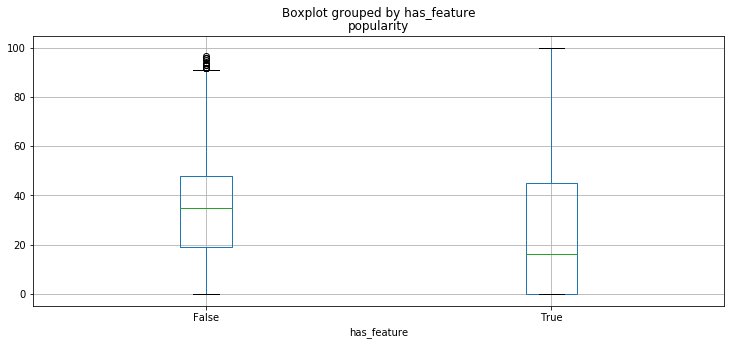

In [129]:
spotify_clean.boxplot("popularity", by = "has_feature", figsize = (12,5))

Might be something here, need a further check with t-test

**UPDATE**: Yep, definitely there is a difference in popularity scores b/t songs with features (less popular overall) than those without

In [130]:
t, p = ss.ttest_ind(spotify_clean[(spotify_clean['has_feature'] == True)]['popularity'].values,
                    spotify_clean[(spotify_clean['has_feature'] == False)]['popularity'].values)

t, p 

(-72.54919762538137, 0.0)

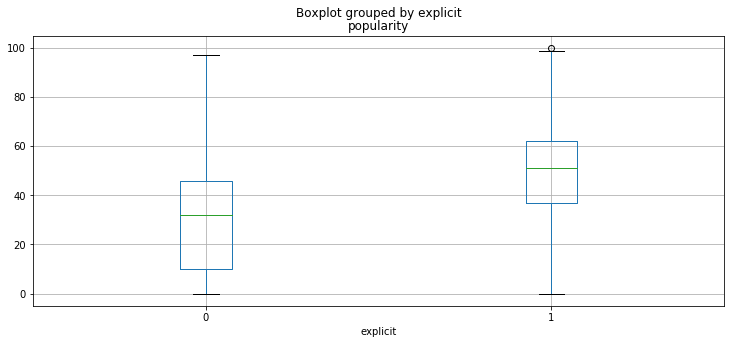

In [131]:
spotify_clean.boxplot("popularity", by = "explicit", figsize = (12,5))

In [132]:
t, p = ss.ttest_ind(spotify_clean[(spotify_clean['explicit'] == 1)]['popularity'].values,
                    spotify_clean[(spotify_clean['explicit'] == 0)]['popularity'].values)

t, p 

(80.61889610577894, 0.0)

Yep, explicit songs = more popular than those without

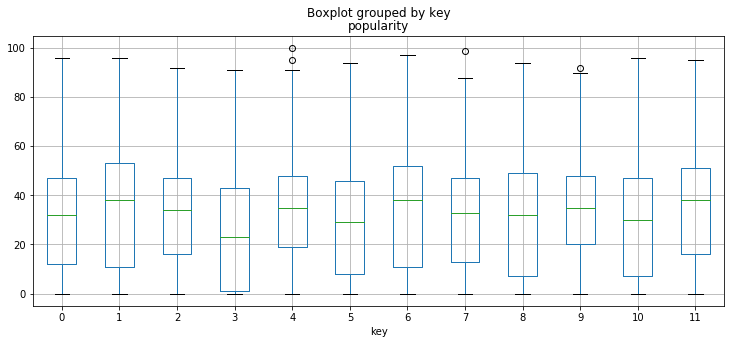

In [133]:
spotify_clean.boxplot("popularity", by = "key", figsize = (12,5))

Looking at the impact of the key with respect to song popularity, doesn't look like there's a relationship here.  But let's double-check.

In [134]:
mod = ols("popularity~key", data =  spotify_clean).fit()
aov_table = statsmodel.stats.anova_lm(mod, typ =2)
aov_table # Looks like there is a significant difference here (wow...didn't reall see this here)

,sum_sq,df,F,PR(>F)
key,4.978794e+03,1.0,10.451424,0.001226
Residual,8.129383e+07,170651.0,NaN,NaN


In [135]:
print(pairwise_tukeyhsd(endog = spotify_clean['popularity'].values,
                  groups = spotify_clean['key'].values, 
                  alpha = 0.05))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   3.5017  0.001   2.7115  4.2918   True
     0      2   1.1117  0.001   0.4039  1.8195   True
     0      3  -5.8397  0.001  -6.8008 -4.8785   True
     0      4   2.2599  0.001   1.4707  3.0491   True
     0      5  -1.7766  0.001  -2.5114 -1.0418   True
     0      6   3.3505  0.001   2.4507  4.2504   True
     0      7   0.3713 0.8192  -0.3183  1.0608  False
     0      8  -0.2112    0.9   -1.049  0.6266  False
     0      9   2.1554  0.001   1.4342  2.8765   True
     0     10  -1.4613  0.001  -2.2664 -0.6563   True
     0     11   3.3082  0.001   2.4683  4.1481   True
     1      2  -2.3899  0.001  -3.2015 -1.5783   True
     1      3  -9.3413  0.001 -10.3813 -8.3013   True
     1      4  -1.2418  0.001  -2.1253 -0.3582   True
     1      5  -5.2782  0.001  -6.1135 -4.4429   True
     1      6  -0.1511    0.

Yeah, might be a bit difficult to group this out. Let's just ignore it. 

#### Let's do some more cleaning with respect to artist as I only want to look at English-speaking artists or Songs

In [136]:
unnatural_char = []
unique_unnatural_char = []

for name in spotify_clean['principal_artist']:
    for each in name:
        if ord(each)> 127:
            unnatural_char.append(each)

for each in unnatural_char:
    if each not in unique_unnatural_char:
        unique_unnatural_char.append(each)
        
unique_unnatural_char

['é',
 'İ',
 'ü',
 'ı',
 'â',
 'č',
 'Э',
 'р',
 'н',
 'е',
 'с',
 'т',
 'Х',
 'м',
 'и',
 'г',
 'у',
 'э',
 'й',
 'á',
 'ó',
 'ń',
 'х',
 'М',
 'а',
 'я',
 'Р',
 'к',
 'ç',
 'í',
 'Γ',
 'ι',
 'ώ',
 'ρ',
 'γ',
 'ο',
 'ς',
 'Κ',
 'α',
 'ά',
 'è',
 'ë',
 'Π',
 'έ',
 'τ',
 'υ',
 'κ',
 'ό',
 'σ',
 'Μ',
 'Β',
 'ί',
 'λ',
 'η',
 'ε',
 'ή',
 'É',
 'Έ',
 'Σ',
 'φ',
 'ω',
 'ν',
 'ñ',
 'Ε',
 'θ',
 'ζ',
 'π',
 'ύ',
 'β',
 'ý',
 '周',
 '璇',
 'Ö',
 'î',
 'О',
 'Т',
 'В',
 'А',
 'Л',
 'Б',
 '葛',
 '蘭',
 '白',
 '光',
 'ě',
 'א',
 'ו',
 'מ',
 'ן',
 'ה',
 'ר',
 'ל',
 'ך',
 'ס',
 'ב',
 'å',
 'ú',
 '崔',
 '萍',
 'Ι',
 '紫',
 '薇',
 '張',
 '琍',
 '敏',
 'ř',
 'ô',
 'Á',
 'ã',
 'セ',
 'キ',
 'ト',
 'オ',
 '・',
 'シ',
 'ゲ',
 'ö',
 '–',
 'メ',
 'ガ',
 'ラ',
 'イ',
 'ブ',
 '秋',
 '元',
 '薫',
 'ÿ',
 'º',
 '’',
 'Ø',
 'Ü',
 'Ů',
 '遠',
 '野',
 '高',
 '志',
 'Α',
 'Δ',
 'μ',
 'δ',
 'Τ',
 'Ν',
 'Λ',
 'ϊ',
 'Ο',
 'χ',
 'Φ',
 '霧',
 'ù',
 'Χ',
 'ช',
 'ย',
 'ุ',
 'ด',
 'ี',
 'ว',
 'ส',
 'า',
 'น',
 'ท',
 '์',
 'ò',
 'š',
 'Ρ',
 'ê',
 'К',
 'п'

In [137]:
unique_names = spotify_clean['principal_artist'].unique()
 
suspect_names = []
    
for name in unique_names:
    count = 0
    for each in name:
        if each in unique_unnatural_char:
            count += 1
    
    if (count > 0):
        suspect_names.append(name)

In [138]:
suspect_names = pd.DataFrame(suspect_names)
suspect_names = suspect_names.rename(columns = {0:"suspect_name"})
suspect_names

,suspect_name
0,Fortugé
1,Hanende İbrahim Efendi
2,Alice Cocéa
3,André Urban
4,Darüttalim-i Musiki Heyeti
...,...
925,Ñengo Flow Ft Dvice y Gaona
926,Quvenzhané Wallis
927,Ásgeir
928,Grupo Delta Norteño


In [139]:
def_non_english_artists = suspect_names[(suspect_names['suspect_name'] != r"Blue Öyster Cult") & 
              (suspect_names['suspect_name'] != r"Motörhead") & 
              (suspect_names['suspect_name'] != r"Mötley Crüe") &
              (suspect_names['suspect_name'] != r"Run–D.M.C.") & 
              (suspect_names['suspect_name'] != r"Les Misérables-Original London Cast") & 
              (suspect_names['suspect_name'] != r"Tony! Toni! Toné!") & 
              (suspect_names['suspect_name'] != r"Céline Dion") & 
              (suspect_names['suspect_name'] != r"Björk") & 
              (suspect_names['suspect_name'] != r"98º") & 
              (suspect_names['suspect_name'] != r"Mýa") & 
              (suspect_names['suspect_name'] != r"Beyoncé") & 
              (suspect_names['suspect_name'] != r"Michael Bublé") & 
              (suspect_names['suspect_name'] != r"Cam’ron") & 
              (suspect_names['suspect_name'] != r"Pokémon") & 
              (suspect_names['suspect_name'] != r"Jhené Aiko") & 
              (suspect_names['suspect_name'] != r"Aminé") & 
              (suspect_names['suspect_name'] != r"BØRNS") & 
              (suspect_names['suspect_name'] != r"Tiësto") & 
              (suspect_names['suspect_name'] != r"Janelle Monáe") & 
              (suspect_names['suspect_name'] != r"Silentó") & 
              (suspect_names['suspect_name'] != r"Dixie D’Amelio") & 
              (suspect_names['suspect_name'] != r"Les Misérables Cast") &  
              (suspect_names['suspect_name'] != r"Les Misérables - 10th Anniversary Concert Cast") & 
              (suspect_names['suspect_name'] != r"The Fisherman’s Friends") &
              (suspect_names['suspect_name'] != r"Snøw")
             ]['suspect_name']

In [140]:
non_english_artists = def_non_english_artists.to_numpy()

In [141]:
spotify_clean['english_speaking_artist'] = spotify_clean['principal_artist'].apply(lambda x: "yes" if x not in non_english_artists else "no")

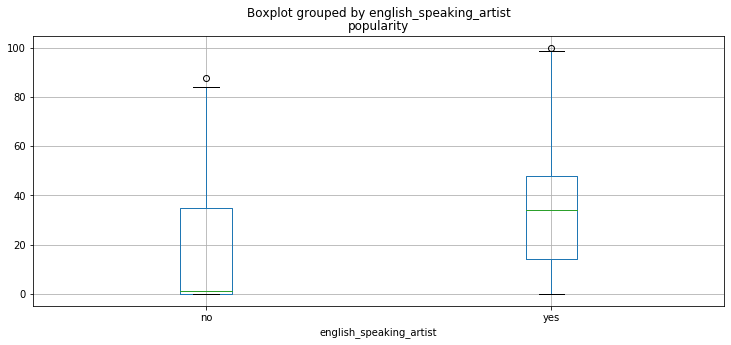

In [142]:
spotify_clean.boxplot("popularity", by = "english_speaking_artist", figsize = (12,5))

In [143]:
t, p = ss.ttest_ind(spotify_clean[(spotify_clean['english_speaking_artist'] == "yes")]['popularity'].values,
                    spotify_clean[(spotify_clean['english_speaking_artist'] == "no")]['popularity'].values)

t, p 

(68.3888133978886, 0.0)

OK, pretty sure English-speaking artists are way more popular than non-English ones. Makes sense since Spotify is more geared to English Audience

In [144]:
spotify_clean_english = spotify_clean[spotify_clean['english_speaking_artist'] != "no"]
spotify_clean_english = spotify_clean_english.drop('english_speaking_artist', axis = 1)

In [145]:
spotify_clean_english

,valence,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,principal_artist,has_feature,feature_artist
0,0.0594,0.98200,0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,Sergei Rachmaninoff,True,James Levine
1,0.9630,0.73200,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,Dennis Day,False,no feature
2,0.0394,0.96100,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,False,no feature
3,0.1650,0.96700,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109,Frank Parker,False,no feature
4,0.2530,0.95700,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,Phil Regan,False,no feature
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,0.08460,0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020,0.0881,105.029,Anuel AA,True,Daddy Yankee
170649,0.7340,0.20600,0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020,0.0605,137.936,Ashnikko,False,no feature
170650,0.6370,0.10100,0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020,0.0809,91.688,MAMAMOO,False,no feature
170651,0.1950,0.00998,0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020,0.3080,75.055,Eminem,False,no feature


In [146]:
spotify_clean_english[['principal_artist', 'popularity']].groupby('principal_artist').sum().sort_values(by = "popularity", ascending = False)

,popularity
principal_artist,
Frank Sinatra,21327
The Beatles,19347
Elvis Presley,17608
The Rolling Stones,16829
Fleetwood Mac,15675
...,...
Auditory Dope,0
Daro Kalmeta,0
L. Royvas,0


In [147]:
spotify_clean_english[['principal_artist', 'acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness','liveness','loudness','speechiness', 'valence']].groupby('principal_artist').mean().head(50)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
principal_artist,,,,,,,,,
"""'In The Heights' Original Broadway Company""",0.651333,0.575333,280066.666667,0.499333,0.000009,0.212600,-7.737000,0.083333,0.482667
"""'Legally Blonde' Ensemble""",0.525500,0.648000,275400.000000,0.413000,0.000000,0.208400,-11.238500,0.470500,0.596500
"""'Til Tuesday""",0.105556,0.557125,255213.500000,0.612250,0.023300,0.127588,-9.638125,0.032150,0.532625
"""Adolescent's Orquesta""",0.470750,0.644750,260206.375000,0.705875,0.000107,0.174500,-6.509375,0.042325,0.802375
"""Alexander 'Skip' Spence""",0.486000,0.372000,179566.750000,0.502500,0.001481,0.262300,-11.994000,0.044225,0.515500
"""Alexander O'Neal""",0.210221,0.689333,281708.833333,0.611083,0.015680,0.180767,-13.211500,0.033317,0.693167
"""Alexis Korner's Blues Incorporated""",0.835000,0.549000,181373.000000,0.207000,0.567000,0.084900,-12.715000,0.043100,0.333000
"""Alive 'N Kickin'""",0.040900,0.407000,168853.000000,0.826000,0.000140,0.048600,-10.014000,0.053000,0.794000
"""Amy Hanaiali'i""",0.580000,0.391000,203893.000000,0.270000,0.000528,0.151000,-14.275000,0.032800,0.370000


Let's say we're into trying to find out some new artists that I might want to check out based on some of my favourite artist currently. However, instead of buying too much into the hype of things (i.e., record label promotion), I want to go with the quality of the songs that they put out instead.  As such, we'll go into this by creating a concatenated data set that has the previous stuff grouped according to artist which contains the following metrics:

* valence (mean)
* acousticness (mean)
* danceability (mean)
* duration_ms (mean)
* energy (mean) 
* instrumentalness (mean)
* liveness (mean)
* loudness (mean)
* loudness (mean)
* popularity (mean) --> Will treat it like a "rating" in that I want total score and this will
* release_date --> convert to a new variable that takes the range b/t earliest and latest work and equate that as time as artist
* speechiness (mean)
* tempo (mean) --> since it's beats per minutes and it'll average out depending on songs 

The trickiness comes from figuring out what to do with explicit and the has_feature thing.  I guess we can look at it in that we go by the number of songs for a given artist and calculate it in terms of the average number of songs and if it meets a certain threshold (say 65%), then we can say the artist is explicit or mainly has feature artists. 

**FIGURE OUT THE YEAR THING**

In [148]:
spotify_english_career_length_min = spotify_clean_english[['principal_artist', 'release_date']].groupby("principal_artist").min()
spotify_english_career_length_min = spotify_english_career_length_min.rename(columns = {'release_date':"earliest_release_date"})
spotify_english_career_length_max = spotify_clean_english[['principal_artist', 'release_date']].groupby("principal_artist").max()
spotify_english_career_length_max = spotify_english_career_length_max.rename(columns = {'release_date':"latest_release_date"})

spotify_english_career_length = pd.concat([spotify_english_career_length_min, spotify_english_career_length_max], axis = 1)
spotify_english_career_length['years_active'] = spotify_english_career_length['latest_release_date'] - spotify_english_career_length['earliest_release_date']
spotify_english_career_length['years_active'] = spotify_english_career_length['years_active'].apply(lambda x: 1 if x == 0 else x)

In [149]:
spotify_english_career_length
# Clearly the biggest issue with this is that artists that had re-released songs after death inflates this bound.  
# Let's just roll with this and see what happens. 

,earliest_release_date,latest_release_date,years_active
principal_artist,,,
"""'In The Heights' Original Broadway Company""",2008,2008,1
"""'Legally Blonde' Ensemble""",2007,2007,1
"""'Til Tuesday""",1981,1986,5
"""Adolescent's Orquesta""",1996,2012,16
"""Alexander 'Skip' Spence""",1969,1969,1
...,...,...,...
will.i.am,2008,2013,5
williams,1983,1983,1
with Studio Orchestra,1932,1932,1


**FIGURING OUT THE NUMERICAL STUFF**

In [150]:
spotify_english_numerical = spotify_clean_english[['principal_artist', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness','liveness','loudness','speechiness', 'valence', "tempo"]].groupby('principal_artist').mean()
spotify_english_numerical

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
principal_artist,,,,,,,,,,,
"""'In The Heights' Original Broadway Company""",48.666667,0.651333,0.575333,280066.666667,0.499333,0.000009,0.212600,-7.737000,0.083333,0.482667,125.411333
"""'Legally Blonde' Ensemble""",44.500000,0.525500,0.648000,275400.000000,0.413000,0.000000,0.208400,-11.238500,0.470500,0.596500,129.429500
"""'Til Tuesday""",34.625000,0.105556,0.557125,255213.500000,0.612250,0.023300,0.127588,-9.638125,0.032150,0.532625,103.080250
"""Adolescent's Orquesta""",62.375000,0.470750,0.644750,260206.375000,0.705875,0.000107,0.174500,-6.509375,0.042325,0.802375,102.908500
"""Alexander 'Skip' Spence""",24.500000,0.486000,0.372000,179566.750000,0.502500,0.001481,0.262300,-11.994000,0.044225,0.515500,80.481750
...,...,...,...,...,...,...,...,...,...,...,...
will.i.am,59.222222,0.137099,0.819444,230200.111111,0.677444,0.000050,0.113656,-6.443111,0.082000,0.688889,125.930889
williams,19.000000,0.935000,0.138000,227200.000000,0.235000,0.712000,0.109000,-16.787000,0.040300,0.094700,78.092000
with Studio Orchestra,7.333333,0.982333,0.496333,181977.666667,0.169667,0.066038,0.129900,-17.901000,0.137700,0.516333,130.833333


In [151]:
pd.concat([spotify_english_numerical, spotify_english_career_length], axis = 1)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,earliest_release_date,latest_release_date,years_active
principal_artist,,,,,,,,,,,,,,
"""'In The Heights' Original Broadway Company""",48.666667,0.651333,0.575333,280066.666667,0.499333,0.000009,0.212600,-7.737000,0.083333,0.482667,125.411333,2008,2008,1
"""'Legally Blonde' Ensemble""",44.500000,0.525500,0.648000,275400.000000,0.413000,0.000000,0.208400,-11.238500,0.470500,0.596500,129.429500,2007,2007,1
"""'Til Tuesday""",34.625000,0.105556,0.557125,255213.500000,0.612250,0.023300,0.127588,-9.638125,0.032150,0.532625,103.080250,1981,1986,5
"""Adolescent's Orquesta""",62.375000,0.470750,0.644750,260206.375000,0.705875,0.000107,0.174500,-6.509375,0.042325,0.802375,102.908500,1996,2012,16
"""Alexander 'Skip' Spence""",24.500000,0.486000,0.372000,179566.750000,0.502500,0.001481,0.262300,-11.994000,0.044225,0.515500,80.481750,1969,1969,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
will.i.am,59.222222,0.137099,0.819444,230200.111111,0.677444,0.000050,0.113656,-6.443111,0.082000,0.688889,125.930889,2008,2013,5
williams,19.000000,0.935000,0.138000,227200.000000,0.235000,0.712000,0.109000,-16.787000,0.040300,0.094700,78.092000,1983,1983,1
with Studio Orchestra,7.333333,0.982333,0.496333,181977.666667,0.169667,0.066038,0.129900,-17.901000,0.137700,0.516333,130.833333,1932,1932,1


**FIGURING OUT THE EXPLICIT + FEATURE ARTIST THING**

Just so that we have something to go off of, we'll say that an artist is considered an "explicit artist" (i.e., has a lot of explicit content) if say at least 60% of their content has explicit content.  The same can be said with the feature artist thing where we can say that an artist with at least 60% of their stuff having a featured artist on it = record-label darling. 

In [152]:
spotify_clean_binary = spotify_clean_english[['principal_artist', 'explicit', "has_feature"]]
spotify_clean_binary['has_feature'] = spotify_clean_binary['has_feature'].apply(lambda x: 1 if x == True else 0)
spotify_clean_binary_mean = spotify_clean_binary.groupby('principal_artist').mean()

C:\Users\micha\anaconda3.0\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [153]:
spotify_clean_binary_mean['explicit'] = spotify_clean_binary_mean['explicit'].apply(lambda x: 1 if x >= 0.6 else 0)
spotify_clean_binary_mean['has_feature'] = spotify_clean_binary_mean['has_feature'].apply(lambda x: 1 if x >= 0.6 else 0)
spotify_clean_binary_mean

,explicit,has_feature
principal_artist,,
"""'In The Heights' Original Broadway Company""",0,0
"""'Legally Blonde' Ensemble""",0,1
"""'Til Tuesday""",0,0
"""Adolescent's Orquesta""",0,0
"""Alexander 'Skip' Spence""",0,0
...,...,...
will.i.am,0,1
williams,0,1
with Studio Orchestra,0,0


In [154]:
spotify_relevant = pd.concat([spotify_english_numerical, spotify_english_career_length, spotify_clean_binary_mean], axis = 1)
spotify_relevant

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,earliest_release_date,latest_release_date,years_active,explicit,has_feature
principal_artist,,,,,,,,,,,,,,,,
"""'In The Heights' Original Broadway Company""",48.666667,0.651333,0.575333,280066.666667,0.499333,0.000009,0.212600,-7.737000,0.083333,0.482667,125.411333,2008,2008,1,0,0
"""'Legally Blonde' Ensemble""",44.500000,0.525500,0.648000,275400.000000,0.413000,0.000000,0.208400,-11.238500,0.470500,0.596500,129.429500,2007,2007,1,0,1
"""'Til Tuesday""",34.625000,0.105556,0.557125,255213.500000,0.612250,0.023300,0.127588,-9.638125,0.032150,0.532625,103.080250,1981,1986,5,0,0
"""Adolescent's Orquesta""",62.375000,0.470750,0.644750,260206.375000,0.705875,0.000107,0.174500,-6.509375,0.042325,0.802375,102.908500,1996,2012,16,0,0
"""Alexander 'Skip' Spence""",24.500000,0.486000,0.372000,179566.750000,0.502500,0.001481,0.262300,-11.994000,0.044225,0.515500,80.481750,1969,1969,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
will.i.am,59.222222,0.137099,0.819444,230200.111111,0.677444,0.000050,0.113656,-6.443111,0.082000,0.688889,125.930889,2008,2013,5,0,1
williams,19.000000,0.935000,0.138000,227200.000000,0.235000,0.712000,0.109000,-16.787000,0.040300,0.094700,78.092000,1983,1983,1,0,1
with Studio Orchestra,7.333333,0.982333,0.496333,181977.666667,0.169667,0.066038,0.129900,-17.901000,0.137700,0.516333,130.833333,1932,1932,1,0,0


OK, in an effort to find out which artist I would enjoy to check out, I probably will have to contend with the fact that there will be a ton of 1-hit wonders or just starting out.  While there isn't anything bad with them, having to include them will significantly impact my ability to computate things so let's just resort to using entries where they have at least 3 years of activity as a published artist (at least assert they had put out 1 additional album or EP). 

In [155]:
spotify_relevant_not_onehitwonder = spotify_relevant[spotify_relevant['years_active'] >= 3]
spotify_relevant_not_onehitwonder

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,earliest_release_date,latest_release_date,years_active,explicit,has_feature
principal_artist,,,,,,,,,,,,,,,,
"""'Til Tuesday""",34.625000,0.105556,0.557125,255213.500000,0.612250,0.023300,0.127588,-9.638125,0.032150,0.532625,103.080250,1981,1986,5,0,0
"""Adolescent's Orquesta""",62.375000,0.470750,0.644750,260206.375000,0.705875,0.000107,0.174500,-6.509375,0.042325,0.802375,102.908500,1996,2012,16,0,0
"""Alexander O'Neal""",36.500000,0.210221,0.689333,281708.833333,0.611083,0.015680,0.180767,-13.211500,0.033317,0.693167,106.825750,1987,1991,4,0,0
"""Anita O'Day""",15.452632,0.842589,0.526695,184001.978947,0.223600,0.002489,0.173861,-14.738474,0.065322,0.499032,115.997484,1932,1962,30,0,0
"""Billo's""",35.500000,0.649000,0.636167,193387.833333,0.466000,0.024984,0.146683,-11.806500,0.060133,0.805333,115.594500,1962,1993,31,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t.A.T.u.,52.714286,0.113609,0.645429,210038.000000,0.769571,0.077777,0.169557,-6.265429,0.072957,0.487286,126.533286,2002,2005,3,0,0
together PANGEA,50.500000,0.000030,0.211000,198550.000000,0.747000,0.191850,0.090400,-6.547500,0.052250,0.506000,104.795500,2011,2014,3,0,0
why mona,42.500000,0.039650,0.541500,181175.000000,0.600000,0.000005,0.372000,-7.314000,0.052300,0.282500,138.978500,1967,1991,24,0,0


So with a recommender system, which is what you'll need to do if you are going to select some suggestions of artists, we need to utilize a different kind of learning model compared to the previous examples.  

Previous exercises above utilized some sort of subset of the data to test the performance of the model with the training data against it.  This is known as supervised learning.  In this case, I don't have a test data since I'm gonig into this pretty blind.  This is known as unsupervised learning.  As such, we'll need to use a slightly different class of object than previous to accomodate this differnce known as NearestNeighbors (*also from the sklearn.neighbors library*).  

However, the process is pretty much the same with the exception of a few things. 

### DOING PREDICTION (Step-by-Step)

**STEP 1:** Use the StandardScaler() to normalize the values used here 

In [156]:
spotify_relevant_not_onehitwonder.head(3)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,earliest_release_date,latest_release_date,years_active,explicit,has_feature
principal_artist,,,,,,,,,,,,,,,,
"""'Til Tuesday""",34.625,0.105556,0.557125,255213.500000,0.612250,0.023300,0.127588,-9.638125,0.032150,0.532625,103.08025,1981,1986,5,0,0
"""Adolescent's Orquesta""",62.375,0.470750,0.644750,260206.375000,0.705875,0.000107,0.174500,-6.509375,0.042325,0.802375,102.90850,1996,2012,16,0,0
"""Alexander O'Neal""",36.500,0.210221,0.689333,281708.833333,0.611083,0.015680,0.180767,-13.211500,0.033317,0.693167,106.82575,1987,1991,4,0,0


In [157]:
scaler = StandardScaler()

In [158]:
spotify_first14 = pd.DataFrame(scaler.fit_transform(spotify_relevant_not_onehitwonder.iloc[:, 0:14]), index = spotify_relevant_not_onehitwonder.index)
spotify_first14 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
principal_artist,,,,,,,,,,,,,,
"""'Til Tuesday""",-0.211047,-0.970510,-0.009386,0.243052,0.310874,-0.475903,-0.737371,0.092917,-0.586233,-0.069554,-0.938740,0.002128,-0.527960,-0.723334
"""Adolescent's Orquesta""",1.358900,0.170937,0.624024,0.308812,0.746026,-0.577241,-0.219460,0.832744,-0.458666,1.320943,-0.949435,0.614937,0.719964,-0.003399
"""Alexander O'Neal""",-0.104970,-0.643369,0.946301,0.592015,0.305451,-0.509197,-0.150277,-0.752046,-0.571606,0.758001,-0.705497,0.247252,-0.287975,-0.788782
"""Anita O'Day""",-1.295718,1.333155,-0.229356,-0.694856,-1.495502,-0.566837,-0.226514,-1.113116,-0.170343,-0.242720,-0.134345,-1.999713,-1.679890,0.912881
"""Billo's""",-0.161544,0.728074,0.561978,-0.571237,-0.368870,-0.468546,-0.526554,-0.419819,-0.235397,1.336193,-0.159441,-0.774096,-0.191981,0.978330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t.A.T.u.,0.812348,-0.945339,0.628929,-0.351942,1.042076,-0.237871,-0.274029,0.890428,-0.074620,-0.303267,0.521750,0.860060,0.383984,-0.854231
together PANGEA,0.687076,-1.300340,-2.511401,-0.503248,0.937168,0.260560,-1.147919,0.823729,-0.334233,-0.206799,-0.831926,1.227745,0.815958,-0.854231
why mona,0.234478,-1.176506,-0.122334,-0.732089,0.253938,-0.577689,1.960928,0.642482,-0.333606,-1.358888,1.296750,-0.569826,-0.287975,0.520190


In [159]:
spotify_last2 = spotify_relevant_not_onehitwonder.iloc[:, 14:16]
spotify_last2

,explicit,has_feature
principal_artist,,
"""'Til Tuesday""",0,0
"""Adolescent's Orquesta""",0,0
"""Alexander O'Neal""",0,0
"""Anita O'Day""",0,0
"""Billo's""",0,0
...,...,...
t.A.T.u.,0,0
together PANGEA,0,0
why mona,0,0


In [160]:
spotify_normalized = pd.concat([spotify_first14, spotify_last2] , axis = 1)

In [161]:
spotify_normalized.columns = spotify_relevant_not_onehitwonder.columns
spotify_normalized

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,earliest_release_date,latest_release_date,years_active,explicit,has_feature
principal_artist,,,,,,,,,,,,,,,,
"""'Til Tuesday""",-0.211047,-0.970510,-0.009386,0.243052,0.310874,-0.475903,-0.737371,0.092917,-0.586233,-0.069554,-0.938740,0.002128,-0.527960,-0.723334,0,0
"""Adolescent's Orquesta""",1.358900,0.170937,0.624024,0.308812,0.746026,-0.577241,-0.219460,0.832744,-0.458666,1.320943,-0.949435,0.614937,0.719964,-0.003399,0,0
"""Alexander O'Neal""",-0.104970,-0.643369,0.946301,0.592015,0.305451,-0.509197,-0.150277,-0.752046,-0.571606,0.758001,-0.705497,0.247252,-0.287975,-0.788782,0,0
"""Anita O'Day""",-1.295718,1.333155,-0.229356,-0.694856,-1.495502,-0.566837,-0.226514,-1.113116,-0.170343,-0.242720,-0.134345,-1.999713,-1.679890,0.912881,0,0
"""Billo's""",-0.161544,0.728074,0.561978,-0.571237,-0.368870,-0.468546,-0.526554,-0.419819,-0.235397,1.336193,-0.159441,-0.774096,-0.191981,0.978330,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t.A.T.u.,0.812348,-0.945339,0.628929,-0.351942,1.042076,-0.237871,-0.274029,0.890428,-0.074620,-0.303267,0.521750,0.860060,0.383984,-0.854231,0,0
together PANGEA,0.687076,-1.300340,-2.511401,-0.503248,0.937168,0.260560,-1.147919,0.823729,-0.334233,-0.206799,-0.831926,1.227745,0.815958,-0.854231,0,0
why mona,0.234478,-1.176506,-0.122334,-0.732089,0.253938,-0.577689,1.960928,0.642482,-0.333606,-1.358888,1.296750,-0.569826,-0.287975,0.520190,0,0


**STEP 2**: Import the necessary class object (*aka. NearestNeighbors*)

In [162]:
from sklearn.neighbors import NearestNeighbors

**STEP 3**: Create the spatial matrix that would enable for generating predictions

OK, so how a recommender system works here is essentially by creating a 2-dimensional matrix which essentially allows us to be able to find a relationship b/t features, which in this case are principal artist with proposed recommended artists to check out based on some distance metric made up of all of these summarized song & artist features.  

As such, we'll need to load an object that enables us to make said matrix to work this out.  In this case, it'll come from the library scipy.sparse called csr_matrix

In [163]:
from scipy.sparse import csr_matrix

In [164]:
spotify_artist_feature_matrix = csr_matrix(spotify_normalized.values)
print(spotify_artist_feature_matrix)

  (0, 0)	-0.21104720715517084
  (0, 1)	-0.9705095761408665
  (0, 2)	-0.009386234186044106
  (0, 3)	0.24305217564316434
  (0, 4)	0.31087376186015103
  (0, 5)	-0.47590264935855564
  (0, 6)	-0.7373712614196744
  (0, 7)	0.0929171155829041
  (0, 8)	-0.5862332848023851
  (0, 9)	-0.06955357700134149
  (0, 10)	-0.9387399229246157
  (0, 11)	0.0021281430771125528
  (0, 12)	-0.527960258719022
  (0, 13)	-0.7233336427468323
  (1, 0)	1.3588998531959877
  (1, 1)	0.17093699524715017
  (1, 2)	0.6240237782204231
  (1, 3)	0.30881199585626323
  (1, 4)	0.7460259614720074
  (1, 5)	-0.5772412627499058
  (1, 6)	-0.21946017909024418
  (1, 7)	0.8327442485568312
  (1, 8)	-0.4586658569704567
  (1, 9)	1.3209434781242702
  (1, 10)	-0.9494353042012527
  :	:
  (6333, 4)	0.6138858409252832
  (6333, 5)	-0.5774930232214216
  (6333, 6)	-0.8911790616046087
  (6333, 7)	0.8484130693115637
  (6333, 8)	0.03875308152897957
  (6333, 9)	0.7359495826741947
  (6333, 10)	0.48423705134852624
  (6333, 11)	1.1051833934528983
  (6333, 

**STEP 4**: Establish the estimator model (i.e. the KNN model that we'll be using) + fit it with the data in the matrix

While we can hyperparameter tune this later on in terms of number of neighbors, the earliest thing we can do here is establish which distance metric to use.  We'll go with euclidean for now.

In [165]:
knn_model = NearestNeighbors(algorithm = 'brute', metric = 'euclidean')
knn_model.fit(spotify_artist_feature_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

**STEP 5**: Getting the recommended artist for us. 

So how this will work is that we'll essentially need to use the model to get the distance and indices from each of the artists for all of the given features. This will be gathered using the method KNeighbors(). 

We will then store this into two lists: (1) containing a list of names of all players and (2) their corresponding comparison with all of the metric (i.e., distance measure) which we can compare to. 

From here, whatever our proposed comparator will be (i.e., who we want to get a recommendation based on), it'll be compared by all of these features.  Obviously, the best comparison will be the one with the smallest distance metric.  However, anything that is valued at zero indicates either: (1) a rare exact match or (2) itself. 

In [166]:
artist = []
recommended = []

In [167]:
for each in spotify_normalized.index:
    
    distances, indices = knn_model.kneighbors(spotify_normalized.loc[each, :].values.reshape(1, -1), n_neighbors = 20)
    
    # indices: this will correspond to artist that are the closest neighbors to the given artist 
    # which in this case matches the number of neighbors set 
    # distances: the metric that is used to compare the given artist with the best matches
    # NOTE: need to use the array.reshape(1,-1) to return an 1-d array instead of a 2-D one if not included 
    
    for num in range(0,len(distances.flatten())):  
        if num == 0:
            artist.append([each])
        else:
            recommended.append([each, num, spotify_normalized.index[indices.flatten()[num]], distances.flatten()[num]])
    
    # Here we are essentially appending the corresponding aspects of indices matching the nearby neighbors & distance 
    # to the appropriate array.  How this works is that for each corresponding 1-D array for a given artist, we'll need to 
    # collapse it to a single array that has a cyclical numbering of nearest neighbor to a given artist with the first lissted
    # representing the artist themselves.  That particular entry gets appended to the artist list while the rest which contains
    # the placing of nearest neighbor + index indicating that similar artist and it's corresponding distance metric to the 
    # recommended list. 

In [168]:
artist

[['"\'Til Tuesday"'],
 ['"Adolescent\'s Orquesta"'],
 ['"Alexander O\'Neal"'],
 ['"Anita O\'Day"'],
 ['"Billo\'s"'],
 ['"Billy \'Crash\' Craddock"'],
 ['"Booker T. & the M.G.\'s"'],
 ['"Cherry Poppin\' Daddies"'],
 ['"Compton\'s Most Wanted"'],
 ['"D\'Angelo"'],
 ['"Danny O\'Keefe"'],
 ['"Des\'ree"'],
 ['"Destiny\'s Child"'],
 ['"Dustin O\'Halloran"'],
 ['"Flamin\' Groovies"'],
 ['"Fred Wesley & The J.B.\'s"'],
 ['"Ge\'La"'],
 ['"Gigi D\'Agostino"'],
 ['"Gilbert O\'Sullivan"'],
 ['"Girls\' Generation"'],
 ['"Gov\'t Mule"'],
 ['"Guns N\' Roses"'],
 ['"Herman\'s Hermits"'],
 ['"Howlin\' Wolf"'],
 ['"Israel Kamakawiwo\'ole"'],
 ['"Jack\'s Mannequin"'],
 ['"Jane\'s Addiction"'],
 ['"Juan D\'Arienzo"'],
 ['"Keali\'i Reichel"'],
 ['"Keb\' Mo\'"'],
 ['"King\'s X"'],
 ['"L\'Trimm"'],
 ['"Lightnin\' Hopkins"'],
 ['"Lil\' Flip"'],
 ['"Lil\' Kim"'],
 ['"Liran\' Roll"'],
 ['"Los Byby\'s"'],
 ['"Los Player\'s"'],
 ['"Los Yonic\'s"'],
 ['"Lupita D\'Alessio"'],
 ['"Manfred Mann\'s Earth Band"'],
 ['"

In [169]:
recommended

[['"\'Til Tuesday"', 1, 'Steve Camp', 1.1574066008712056],
 ['"\'Til Tuesday"', 2, 'Jars Of Clay', 1.2680521598716508],
 ['"\'Til Tuesday"', 3, 'Angela Bofill', 1.2744948451886966],
 ['"\'Til Tuesday"', 4, 'Melissa Etheridge', 1.283403038524472],
 ['"\'Til Tuesday"', 5, 'Drivin N Cryin', 1.295120851195781],
 ['"\'Til Tuesday"', 6, 'Jon Bon Jovi', 1.3100346894682242],
 ['"\'Til Tuesday"', 7, 'Aaron Kwok', 1.3216048824697588],
 ['"\'Til Tuesday"', 8, 'Badfinger', 1.3225721836186142],
 ['"\'Til Tuesday"', 9, 'Robin Trower', 1.355352047966384],
 ['"\'Til Tuesday"', 10, 'Soul Coughing', 1.366892041129224],
 ['"\'Til Tuesday"', 11, 'Joe Ely', 1.3910504549139475],
 ['"\'Til Tuesday"', 12, 'Del Amitri', 1.410178528966642],
 ['"\'Til Tuesday"', 13, 'The Sugarcubes', 1.4221183026858921],
 ['"\'Til Tuesday"', 14, 'Extreme', 1.439561632783343],
 ['"\'Til Tuesday"', 15, 'Gary P. Nunn', 1.4425072351092207],
 ['"\'Til Tuesday"', 16, 'Troop', 1.4593294201387288],
 ['"\'Til Tuesday"', 17, 'Debbie Gibso

In [170]:
spotify_recommendations = pd.DataFrame(recommended, 
                                       columns = ["principal_artist", "recommendation_placement", 'artist_recommended', "distance_metric"])

In [171]:
spotify_recommendations = spotify_recommendations.drop_duplicates() # Turns out I got duplicate rows, so just eliminate them here.

In [172]:
spotify_recommendations

,principal_artist,recommendation_placement,artist_recommended,distance_metric
0,"""'Til Tuesday""",1,Steve Camp,1.157407
1,"""'Til Tuesday""",2,Jars Of Clay,1.268052
2,"""'Til Tuesday""",3,Angela Bofill,1.274495
3,"""'Til Tuesday""",4,Melissa Etheridge,1.283403
4,"""'Til Tuesday""",5,Drivin N Cryin,1.295121
...,...,...,...,...
120360,zebrahead,15,The Maine,1.289500
120361,zebrahead,16,Billy Talent,1.318124
120362,zebrahead,17,Sleeping With Sirens,1.325652
120363,zebrahead,18,Evans Blue,1.347487


**STEP 7:** Let's test this out with some of my favourite artists

In [173]:
# Let's see what are some of the recommendations are for Drake
spotify_recommendations[spotify_recommendations['principal_artist'] == "Drake"]

# Overall, not a bad selection here.

,principal_artist,recommendation_placement,artist_recommended,distance_metric
30989,Drake,1,J. Cole,0.761939
30990,Drake,2,A$AP Rocky,0.919789
30991,Drake,3,ScHoolboy Q,1.004492
30992,Drake,4,Mac Miller,1.008716
30993,Drake,5,King Lil G,1.121624
30994,Drake,6,Kanye West,1.184920
30995,Drake,7,Nicki Minaj,1.195664
30996,Drake,8,Lil Uzi Vert,1.216529
30997,Drake,9,G-Eazy,1.254710
30998,Drake,10,Bryson Tiller,1.314541


In [174]:
spotify_recommendations[spotify_recommendations['principal_artist'] == "Beyoncé"]

# Something is a bit off here with the inclusion of Macklemore.  Although I'm surprised not to see Aaliyah higher. 

,principal_artist,recommendation_placement,artist_recommended,distance_metric
12350,Beyoncé,1,John Legend,1.244374
12351,Beyoncé,2,Ne-Yo,1.281314
12352,Beyoncé,3,Chris Brown,1.305807
12353,Beyoncé,4,Christina Aguilera,1.334083
12354,Beyoncé,5,Macklemore,1.389601
12355,Beyoncé,6,Lloyd,1.396699
12356,Beyoncé,7,Anthony Hamilton,1.510264
12357,Beyoncé,8,T-Pain,1.521747
12358,Beyoncé,9,Justin Bieber,1.525583
12359,Beyoncé,10,Trey Songz,1.526292


In [175]:
spotify_recommendations[spotify_recommendations['principal_artist'] == "Chris Stapleton"]
# Given the selections, I can see how Pentatonix is similar since his style is really vocal + accoustic heavy, but more 
# surprised to see not a heavy country support here as compared to R&B. 

,principal_artist,recommendation_placement,artist_recommended,distance_metric
21964,Chris Stapleton,1,Pentatonix,0.792096
21965,Chris Stapleton,2,Glass Animals,0.806245
21966,Chris Stapleton,3,Passenger,0.909123
21967,Chris Stapleton,4,Niall Horan,0.917061
21968,Chris Stapleton,5,Kacey Musgraves,0.934067
21969,Chris Stapleton,6,Lykke Li,0.953479
21970,Chris Stapleton,7,Tori Kelly,0.990706
21971,Chris Stapleton,8,Rayland Baxter,0.996492
21972,Chris Stapleton,9,Adele,1.023448
21973,Chris Stapleton,10,LANY,1.077960


In [176]:
spotify_recommendations[spotify_recommendations['principal_artist'] == "Van Halen"]

# Aside from the inclusion of Nirvana in the Top 20, it's pretty par for the course with other hair metal bands making 
# up the top 3

,principal_artist,recommendation_placement,artist_recommended,distance_metric
114570,Van Halen,1,Def Leppard,0.904620
114571,Van Halen,2,Quiet Riot,0.945634
114572,Van Halen,3,Twisted Sister,0.951334
114573,Van Halen,4,Iggy Pop,0.973343
114574,Van Halen,5,Siouxsie and the Banshees,1.003940
114575,Van Halen,6,Butthole Surfers,1.037098
114576,Van Halen,7,Mötley Crüe,1.078332
114577,Van Halen,8,Skid Row,1.088284
114578,Van Halen,9,The Flaming Lips,1.099217
114579,Van Halen,10,The Stone Roses,1.222734


In [177]:
spotify_recommendations[spotify_recommendations['principal_artist'] == "2Pac"]

# Gangsta rap at it's finest here with the inclusion of Scarface, NWA, Biggie, Ice Cube

,principal_artist,recommendation_placement,artist_recommended,distance_metric
1615,2Pac,1,OutKast,1.042229
1616,2Pac,2,Scarface,1.058465
1617,2Pac,3,N.W.A.,1.075888
1618,2Pac,4,Missy Elliott,1.107030
1619,2Pac,5,The Roots,1.135131
1620,2Pac,6,The Notorious B.I.G.,1.150713
1621,2Pac,7,Ice Cube,1.181171
1622,2Pac,8,Mac Dre,1.209076
1623,2Pac,9,Vico C,1.310153
1624,2Pac,10,D12,1.323417


In [178]:
spotify_recommendations[spotify_recommendations['principal_artist'] == "Dierks Bentley"]

# Not too surprising to see some Pop Music artist included in the more mainstream Country artist recommendation.

,principal_artist,recommendation_placement,artist_recommended,distance_metric
29165,Dierks Bentley,1,Miranda Lambert,0.508117
29166,Dierks Bentley,2,Blake Shelton,0.541879
29167,Dierks Bentley,3,Kelly Clarkson,0.682496
29168,Dierks Bentley,4,Joe Nichols,0.741610
29169,Dierks Bentley,5,Jo Dee Messina,0.793914
29170,Dierks Bentley,6,Casey Donahew,0.801763
29171,Dierks Bentley,7,Jason Aldean,0.814028
29172,Dierks Bentley,8,Panic! At The Disco,0.829895
29173,Dierks Bentley,9,Rascal Flatts,0.835066
29174,Dierks Bentley,10,OneRepublic,0.856147


In [179]:
spotify_recommendations[spotify_recommendations['principal_artist'] == "Steve Aoki"]

# I mean the Zac Efron thing here is weird, but the other makes sense since it's more Alternative / EDM focused.

,principal_artist,recommendation_placement,artist_recommended,distance_metric
97869,Steve Aoki,1,Calvin Harris,1.194024
97870,Steve Aoki,2,Zac Efron,1.386521
97871,Steve Aoki,3,David Guetta,1.442954
97872,Steve Aoki,4,Major Lazer,1.464153
97873,Steve Aoki,5,Diplo,1.496195
97874,Steve Aoki,6,Vicetone,1.533679
97875,Steve Aoki,7,Empire of the Sun,1.551371
97876,Steve Aoki,8,Loud Luxury,1.553341
97877,Steve Aoki,9,BIGBANG,1.590949
97878,Steve Aoki,10,Foster The People,1.596571


In [180]:
spotify_recommendations[spotify_recommendations['principal_artist'] == "The Black Keys"]

# Might be a bit more off with alternative artists

,principal_artist,recommendation_placement,artist_recommended,distance_metric
103075,The Black Keys,1,Trampled by Turtles,0.698647
103076,The Black Keys,2,Casey Donahew,0.839706
103077,The Black Keys,3,Rascal Flatts,0.897397
103078,The Black Keys,4,Blake Shelton,0.912384
103079,The Black Keys,5,Andrew Bird,0.917646
103080,The Black Keys,6,Cody Johnson,0.959947
103081,The Black Keys,7,Chris Young,0.962256
103082,The Black Keys,8,Dierks Bentley,0.978505
103083,The Black Keys,9,Tim McGraw,1.000722
103084,The Black Keys,10,Lady A,1.005983


In [181]:
spotify_recommendations[spotify_recommendations['principal_artist'] == "Kings of Leon"]

,principal_artist,recommendation_placement,artist_recommended,distance_metric
58368,Kings of Leon,1,Lifehouse,0.613614
58369,Kings of Leon,2,TV On The Radio,0.622406
58370,Kings of Leon,3,The Killers,0.654493
58371,Kings of Leon,4,3 Doors Down,0.756147
58372,Kings of Leon,5,Kelly Clarkson,0.774452
58373,Kings of Leon,6,Matthew West,0.846543
58374,Kings of Leon,7,Incubus,0.855696
58375,Kings of Leon,8,You Me At Six,0.862926
58376,Kings of Leon,9,Keane,0.887258
58377,Kings of Leon,10,Arctic Monkeys,0.908046


Overall, the KNN model used as a content-based recommender system seemed to work out pretty well in terms of recommending suggested artists that appear to have a similar sound as those that are being compared to.  Further work can be done here to show off a secondary type of recommender system (collaborative) which would probably have a different kind of output compared to what's shown here. 

So let's try that out. 

**NOTE:** I clearly do not have data for a rating deal here. So the best call in terms of rating would be to generate some fake ones with the help of the dataframe.sample() function to get a list of artists and jsut give a rating from 0 (poor) to 5 (greatest thing ever)

Essentially what you'll need to do is create a data frame that has three columns that's of relevance to us: 

1) column with some face user_id
2) column containing the indices corresponding to the artist of interest
3) some user rating which we'll go with a Likert scale of 0 to 5

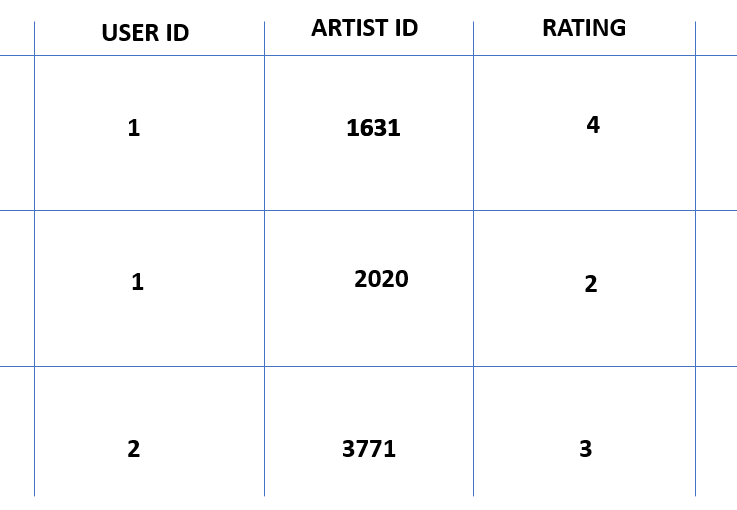

In [221]:
spotify_normalized_index = spotify_normalized.reset_index()
spotify_normalized_index = pd.concat([spotify_normalized_index, pd.DataFrame(np.array(spotify_normalized_index.index), columns = ['artist_id'])], axis = 1)
spotify_normalized_index

,principal_artist,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,earliest_release_date,latest_release_date,years_active,explicit,has_feature,artist_id
0,"""'Til Tuesday""",-0.211047,-0.970510,-0.009386,0.243052,0.310874,-0.475903,-0.737371,0.092917,-0.586233,-0.069554,-0.938740,0.002128,-0.527960,-0.723334,0,0,0
1,"""Adolescent's Orquesta""",1.358900,0.170937,0.624024,0.308812,0.746026,-0.577241,-0.219460,0.832744,-0.458666,1.320943,-0.949435,0.614937,0.719964,-0.003399,0,0,1
2,"""Alexander O'Neal""",-0.104970,-0.643369,0.946301,0.592015,0.305451,-0.509197,-0.150277,-0.752046,-0.571606,0.758001,-0.705497,0.247252,-0.287975,-0.788782,0,0,2
3,"""Anita O'Day""",-1.295718,1.333155,-0.229356,-0.694856,-1.495502,-0.566837,-0.226514,-1.113116,-0.170343,-0.242720,-0.134345,-1.999713,-1.679890,0.912881,0,0,3
4,"""Billo's""",-0.161544,0.728074,0.561978,-0.571237,-0.368870,-0.468546,-0.526554,-0.419819,-0.235397,1.336193,-0.159441,-0.774096,-0.191981,0.978330,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330,t.A.T.u.,0.812348,-0.945339,0.628929,-0.351942,1.042076,-0.237871,-0.274029,0.890428,-0.074620,-0.303267,0.521750,0.860060,0.383984,-0.854231,0,0,6330
6331,together PANGEA,0.687076,-1.300340,-2.511401,-0.503248,0.937168,0.260560,-1.147919,0.823729,-0.334233,-0.206799,-0.831926,1.227745,0.815958,-0.854231,0,0,6331
6332,why mona,0.234478,-1.176506,-0.122334,-0.732089,0.253938,-0.577689,1.960928,0.642482,-0.333606,-1.358888,1.296750,-0.569826,-0.287975,0.520190,0,0,6332
6333,will.i.am,1.180532,-0.871920,1.886828,-0.086392,0.613886,-0.577493,-0.891179,0.848413,0.038753,0.735950,0.484237,1.105183,0.767961,-0.723334,0,1,6333


In [220]:
spotify_normalized_index[spotify_normalized_index['artist_id'] == 1631]

,principal_artist,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,earliest_release_date,latest_release_date,years_active,explicit,has_feature,artist_id
1631,Drake,1.285569,-0.658341,0.709904,0.105889,0.089194,-0.536795,-0.034647,0.498867,1.857835,-0.930827,0.118522,1.146037,1.10394,-0.330642,1,0,1631


In [224]:
spotify_normalized_index.sample(10)

,principal_artist,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,earliest_release_date,latest_release_date,years_active,explicit,has_feature,artist_id
482,Avant,0.633073,-0.631587,0.891977,0.234282,-0.060001,-0.577672,-0.360571,1.063640,-0.237410,0.040161,0.399411,0.778352,0.767961,-0.199745,0,0,482
5397,The Andrews Sisters,-0.377421,1.169934,0.848397,-0.917186,-1.039184,-0.577584,-0.463094,-0.430142,0.516624,0.900661,1.122958,-1.795443,0.287990,3.269031,0,0,5397
3408,Los Mier,0.385344,-0.542141,0.372226,-0.699782,0.328690,-0.577691,-0.487179,-0.106528,-0.365785,1.103370,-0.013151,0.451521,0.671967,0.192947,0,0,3408
1870,Falco,0.964292,-0.616681,1.381947,0.337280,0.771705,-0.574226,-0.818046,-0.036350,-0.159337,1.534479,0.678150,0.042982,-0.575957,-0.854231,0,0,1870
5044,SoMo,1.079057,-0.762387,0.608276,-0.155392,0.608500,-0.543556,-0.480318,1.058248,-0.362263,-0.474110,0.293199,1.268599,0.863955,-0.854231,0,0,5044
5050,Soft Cell,-0.189832,-0.289343,0.047114,0.876278,0.142390,-0.574981,1.620378,-0.114624,0.045022,0.259858,1.375854,0.002128,0.575972,0.781984,0,0,5050
6017,Usher,0.964490,-0.965813,1.168487,0.143946,0.272774,-0.577309,-0.437741,0.844299,0.147168,0.067217,-0.095309,0.533229,1.103940,0.651087,0,0,6017
300,Ambroise Thomas,-2.169945,1.624077,-2.034310,2.662953,-1.942622,0.996795,-1.139823,-1.918705,-0.395457,-2.447918,0.739771,-1.427758,-2.111864,-0.592436,0,1,300
3654,Marlene Dietrich,-0.793295,1.506346,-1.754803,-0.476832,-2.015283,-0.577595,0.973957,-1.498829,-0.470681,-1.421605,-2.397853,-2.081421,-0.287975,2.941788,0,0,3654
5881,Todd Rundgren,-0.527017,-0.360918,-0.764382,-0.474994,0.044600,-0.200648,0.715380,-0.193455,-0.273226,0.153003,0.240337,-0.447265,0.287990,1.109227,0,0,5881


For the sake of generating a fake enough sample of user ratings, we'll make a dataframe that consists of 2000 different fake user that had rated 5 artists (this case at random) with a rating of 1 (worst) to 5 (best). 

In [282]:
fake_user_rating = pd.DataFrame({"artist_id": np.random.randint(low = 0, high = 6334, size = 10000),
              "ratings": np.repeat([1,2,3,4,5], 2000), 
              "user_id": np.repeat(range(1, 2001), 5)})

In [284]:
just_artist = spotify_normalized_index[['principal_artist', 'artist_id']]

In [290]:
fake_user_artist_table = pd.merge(fake_user_rating, just_artist).pivot_table(index = 'principal_artist', columns = "user_id", values = 'ratings').fillna(0)

In [301]:
fake_user_matrix = csr_matrix(fake_user_artist_table)

In [302]:
knn_fake_model = NearestNeighbors(algorithm = 'brute', metric = 'cosine') # decision is because of the sparseness of the data
knn_fake_model.fit(fake_user_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [303]:
artist_selected = []
recommended_artist = []

In [305]:
for each in fake_user_artist_table.index:
    
    distances, indices = knn_fake_model.kneighbors(fake_user_artist_table.loc[each, :].values.reshape(1, -1), n_neighbors = 10)
    
    for num in range(0,len(distances.flatten())):  
        if num == 0:
            artist_selected.append([each])
        else:
            recommended_artist.append([each, num, fake_user_artist_table.index[indices.flatten()[num]], distances.flatten()[num]])
    

In [306]:
recommended_artist

[['"\'Til Tuesday"', 1, 'Kylie Minogue', 0.18350341907227385],
 ['"\'Til Tuesday"', 2, 'Rocko', 0.45566894604818264],
 ['"\'Til Tuesday"', 3, 'Maroon 5', 0.6039409828093303],
 ['"\'Til Tuesday"', 4, 'Liva Weel', 0.7113248654051871],
 ['"\'Til Tuesday"', 5, 'Harold Courlander', 0.7385118198157545],
 ['"\'Til Tuesday"', 6, 'John Stafford Smith', 0.8174258141649446],
 ['"\'Til Tuesday"', 7, 'Chris Renzema', 0.9037749551350623],
 ['"\'Til Tuesday"', 8, 'SALES', 0.9309934440657646],
 ['"\'Til Tuesday"', 9, 'Electric Guest', 0.9309934440657646],
 ['"Adolescent\'s Orquesta"', 1, 'Tevin Campbell', 0.029857499854668124],
 ['"Adolescent\'s Orquesta"', 2, 'Amerie', 0.3532383332364455],
 ['"Adolescent\'s Orquesta"', 3, 'Ricky Martin', 0.42151877915025016],
 ['"Adolescent\'s Orquesta"', 4, 'Tom Browne', 0.46186176480295005],
 ['"Adolescent\'s Orquesta"', 5, 'Yusef Lateef', 0.757464374963667],
 ['"Adolescent\'s Orquesta"', 6, 'Surfaces', 0.9351796276447836],
 ['"Adolescent\'s Orquesta"', 7, 'Lauv', 

In [309]:
fake_spotify_recommendations = pd.DataFrame(recommended_artist, columns = ["principal_artist", "recommendation_placement", 'artist_recommended', "distance_metric"])

In [310]:
fake_spotify_recommendations[fake_spotify_recommendations['principal_artist'] == "Drake"]

,principal_artist,recommendation_placement,artist_recommended,distance_metric
11727,Drake,1,Roza Eskenazi,0.245753
11728,Drake,2,Elvis Presley,0.411032
11729,Drake,3,Abdel Halim Hafez,0.418086
11730,Drake,4,Lea Michele,0.424892
11731,Drake,5,Fruko Y Sus Tesos,0.764298
11732,Drake,6,Los Titanes De Durango,0.894591
11733,Drake,7,George Lam,0.921433
11734,Drake,8,G. Nakos,0.937006
11735,Drake,9,Sia,0.942834


In [311]:
fake_spotify_recommendations[fake_spotify_recommendations['principal_artist'] == "Van Halen"]

,principal_artist,recommendation_placement,artist_recommended,distance_metric
43155,Van Halen,1,Van Halen,0.000000
43156,Van Halen,2,The Romantics,0.051317
43157,Van Halen,3,Adriel Favela,0.485504
43158,Van Halen,4,Carol Channing,0.575736
43159,Van Halen,5,Palomo,1.000000
43160,Van Halen,6,Paloma San Basilio,1.000000
43161,Van Halen,7,Panic! At The Disco,1.000000
43162,Van Halen,8,Pantera,1.000000
43163,Van Halen,9,Pahari Sanyal,1.000000


In [312]:
fake_spotify_recommendations[fake_spotify_recommendations['principal_artist'] == "Lady Gaga"]

,principal_artist,recommendation_placement,artist_recommended,distance_metric
22590,Lady Gaga,1,Martin Jensen,0.142507
22591,Lady Gaga,2,Yumi Arai,0.159159
22592,Lady Gaga,3,Carmen Miranda,0.485504
22593,Lady Gaga,4,Pat Metheny Group,0.498190
22594,Lady Gaga,5,David Olivarez,0.504926
22595,Lady Gaga,6,France Joli,0.713382
22596,Lady Gaga,7,Fayza Ahmed,0.735294
22597,Lady Gaga,8,The Slackers,0.810010
22598,Lady Gaga,9,Papa Roach,1.000000


Obviously, if we were to compare the content recommended against this user generated one, we can see that there is a great deal of inferiority as it relates to accuracy of recommender as I can't really see any of these artists being a great recommendation for those that enjoy Drake.

This would make sense as I created a randomized user rating that judges artists at random rather than what the actual population is interested in. So we can really see here that the representativeness of data to the population is more important here than ever. 

However, if we can get a large enough data sample of actual user rating, the performance of teh recommender would be a lot more comparable to the content-based recommender system